# Structured Clinical Data-Based AI for Alzheimer’s Detection: A Comparative Study of Deep Learning and Traditional Machine Learning Approaches

# Import necessary libraries

In [3]:
# Import data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import machine learning and modelling libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from skorch import NeuralNetBinaryClassifier
from skorch.callbacks import EpochScoring
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn

# Import metrics and utility libraries
from sklearn.utils import shuffle

# Import warning suppression
import warnings
warnings.filterwarnings("ignore")

# Import deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load Dataset

In [6]:
# Read the CSV file in the DataFrame(df)
df_Alzheimer = pd.read_csv("C:/Users/amaka/OneDrive/Desktop/alzheimers_prediction_dataset.csv")

# Exploratory Data Analysis

In [9]:
# Print the DataFrame
df_Alzheimer.head(20)

Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0          Spain   90    Male                1  33.0                  Medium   
1      Argentina   72    Male                7  29.9                  Medium   
2   South Africa   86  Female               19  22.9                    High   
3          China   53    Male               17  31.2                     Low   
4         Sweden   58  Female                3  30.0                    High   
5          Spain   55  Female                2  34.0                  Medium   
6    South Korea   91  Female               18  24.1                    High   
7          China   67  Female               11  23.6                     Low   
8          China   84  Female               11  22.0                    High   
9        Germany   72  Female               11  32.4                  Medium   
10        Sweden   80  Female                2  31.6                  Medium   
11            UK   69    Male                2  19.8                     Low   
12        Canada   56  Female               11  35.0                  Medium   
13         India   61    Male               15  22.9                    High   
14         Italy   86    Male               10  32.1                     Low   
15        Canada   53  Female                6  29.1                     Low   
16           USA   61  Female               13  33.1                  Medium   
17         India   64    Male                2  27.9                     Low   
18         India   51    Male               12  31.7                     Low   
19        Russia   60    Male                1  28.0                  Medium   

   Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0           Never        Occasionally       No           No  ...   
1          Former               Never       No           No  ...   
2         Current        Occasionally       No          Yes  ...   
3           Never           Regularly      Yes           No  ...   
4          Former               Never      Yes           No  ...   
5         Current               Never       No           No  ...   
6          Former        Occasionally       No          Yes  ...   
7         Current           Regularly       No           No  ...   
8         Current           Regularly       No           No  ...   
9           Never        Occasionally       No          Yes  ...   
10        Current               Never       No          Yes  ...   
11          Never        Occasionally       No           No  ...   
12        Current               Never      Yes          Yes  ...   
13         Former           Regularly       No           No  ...   
14          Never               Never       No           No  ...   
15          Never        Occasionally       No           No  ...   
16         Former               Never       No          Yes  ...   
17         Former        Occasionally       No           No  ...   
18          Never               Never      Yes          Yes  ...   
19          Never               Never       No           No  ...   

   Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0         Healthy                   High            Retired         Single   
1         Healthy                 Medium         Unemployed        Widowed   
2         Average                 Medium           Employed         Single   
3         Healthy                 Medium            Retired         Single   
4       Unhealthy                   High           Employed        Married   
5         Healthy                    Low            Retired        Married   
6         Average                   High           Employed        Widowed   
7       Unhealthy                    Low         Unemployed        Widowed   
8         Average                   High           Employed         Single   
9         Average                   High           Employed         Single   
10      Unhealthy                 Medium 

In [11]:
# Print the shape of the DataFrame
df_Alzheimer.shape

(74283, 25)

In [13]:
# Print basic information of the DataFrame
df_Alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [15]:
# Generate descriptive statistics for numeric columns
df_Alzheimer.describe()

Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000

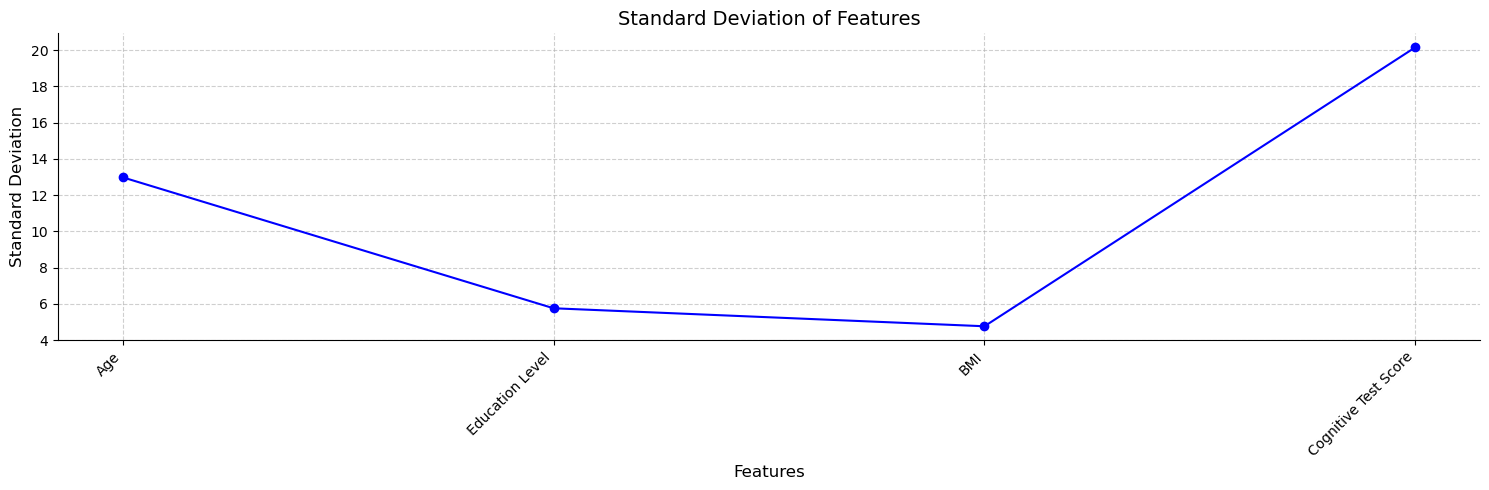

In [17]:
# Get standard deviation of each feature
desc = df_Alzheimer.describe().T

# Plot standard deviation as a line plot with feature names on x-axis
plt.figure(figsize=(15, 5))
plt.plot(desc.index, desc['std'], marker='o', linestyle='-', color='b')

plt.title('Standard Deviation of Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

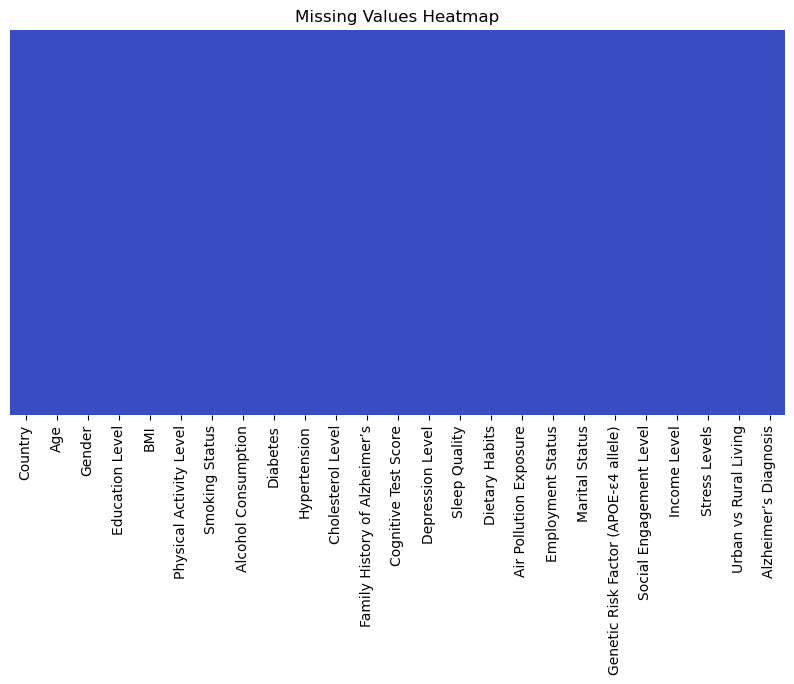

In [19]:
# Check for missing value
print(df_Alzheimer.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10,5))
sns.heatmap(df_Alzheimer.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [21]:
# Check for duplicates
sum(df_Alzheimer.duplicated())

0

In [23]:
# Unique values in categorical columns
print("\n Unique Values in Categorical Columns:")
categorical_columns = df_Alzheimer.select_dtypes(include=['object']).columns

# Explore unique values and distributions in categorical columns
for col in categorical_columns:
    print(f"{col}: {df_Alzheimer[col].nunique()} unique values")
    print(df_Alzheimer[col].value_counts())
    print()


 Unique Values in Categorical Columns:
Country: 20 unique values
Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64

Gender: 2 unique values
Gender
Female    37249
Male      37034
Name: count, dtype: int64

Physical Activity Level: 3 unique values
Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64

Smoking Status: 3 unique values
Smoking Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64

Alcohol Consumption: 3 unique values
Alcohol Consumption
Never           24865
Regularly       24738
Occasionally    24680
N

 Numerical Columns:
 - Age
 - Education Level
 - BMI
 - Cognitive Test Score


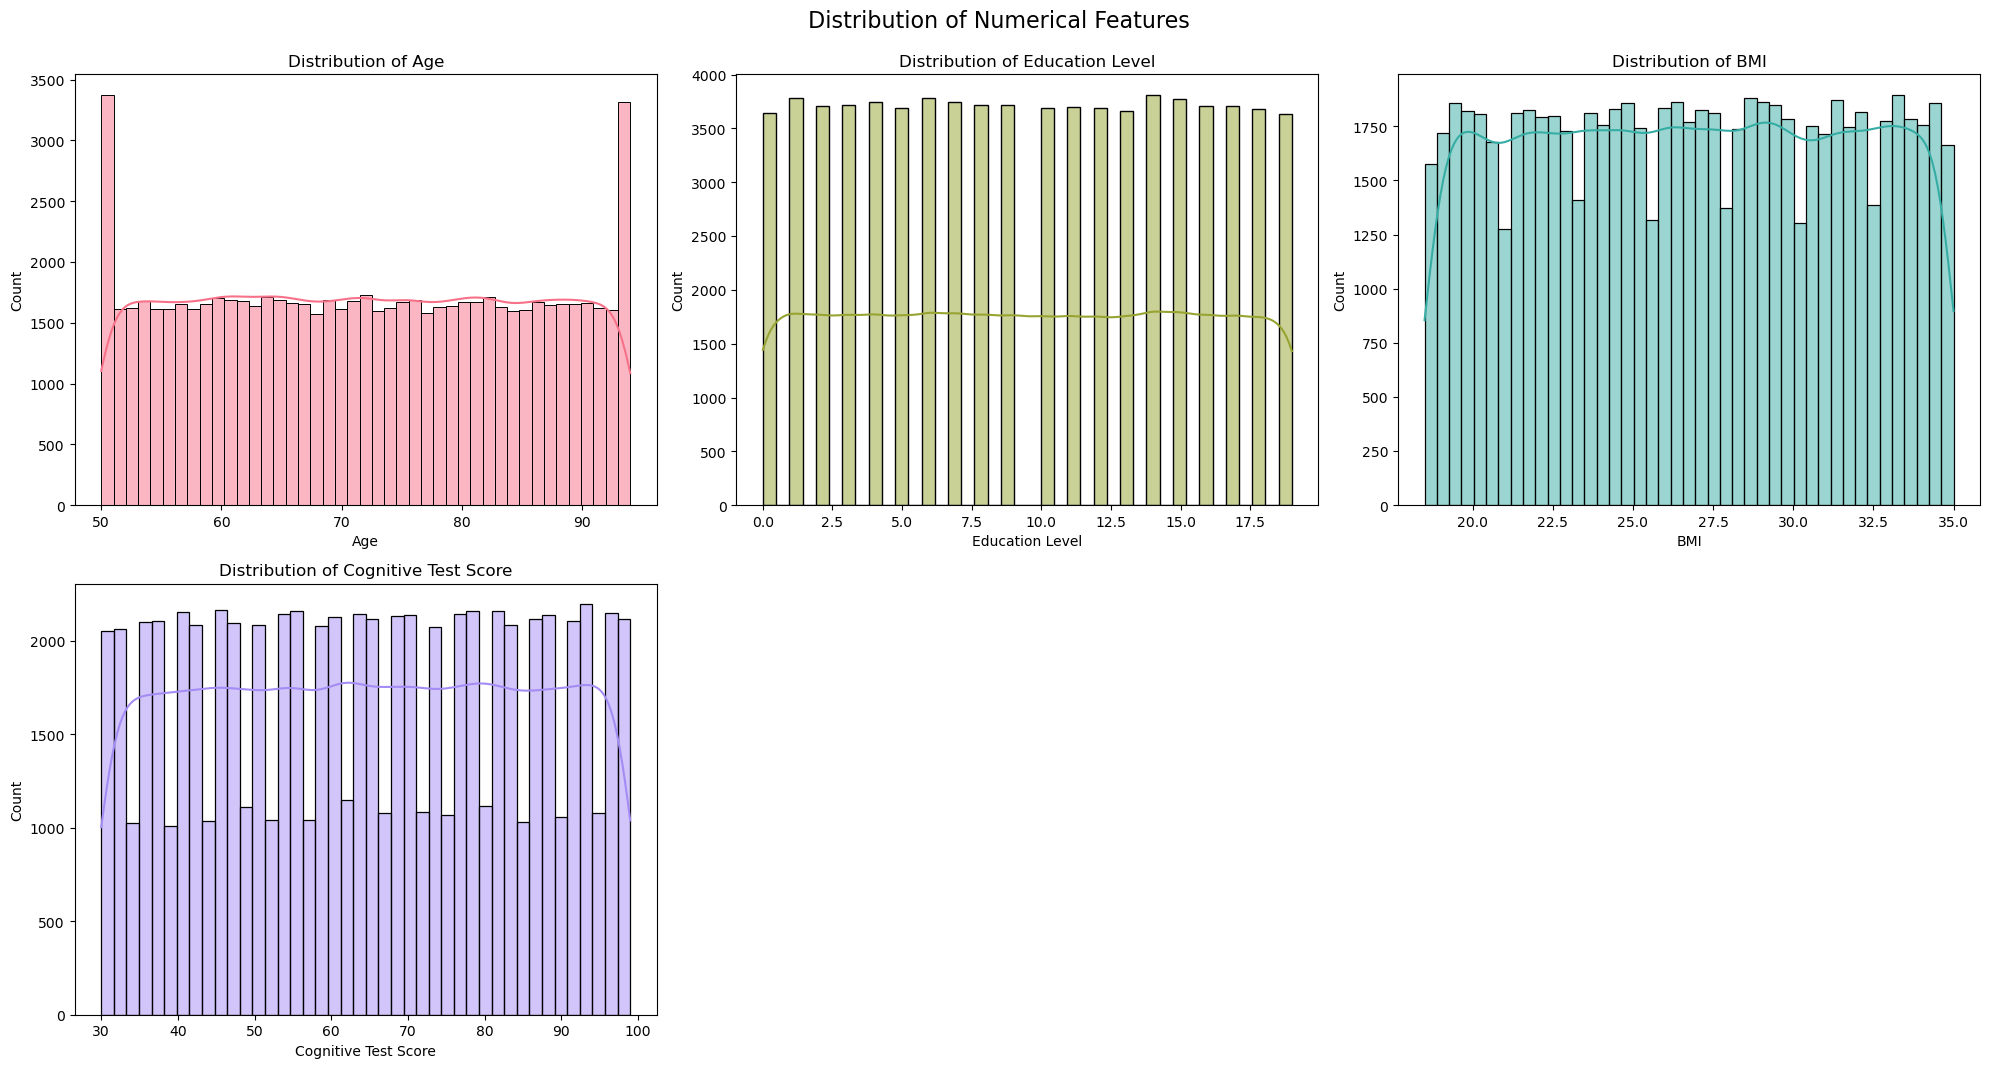

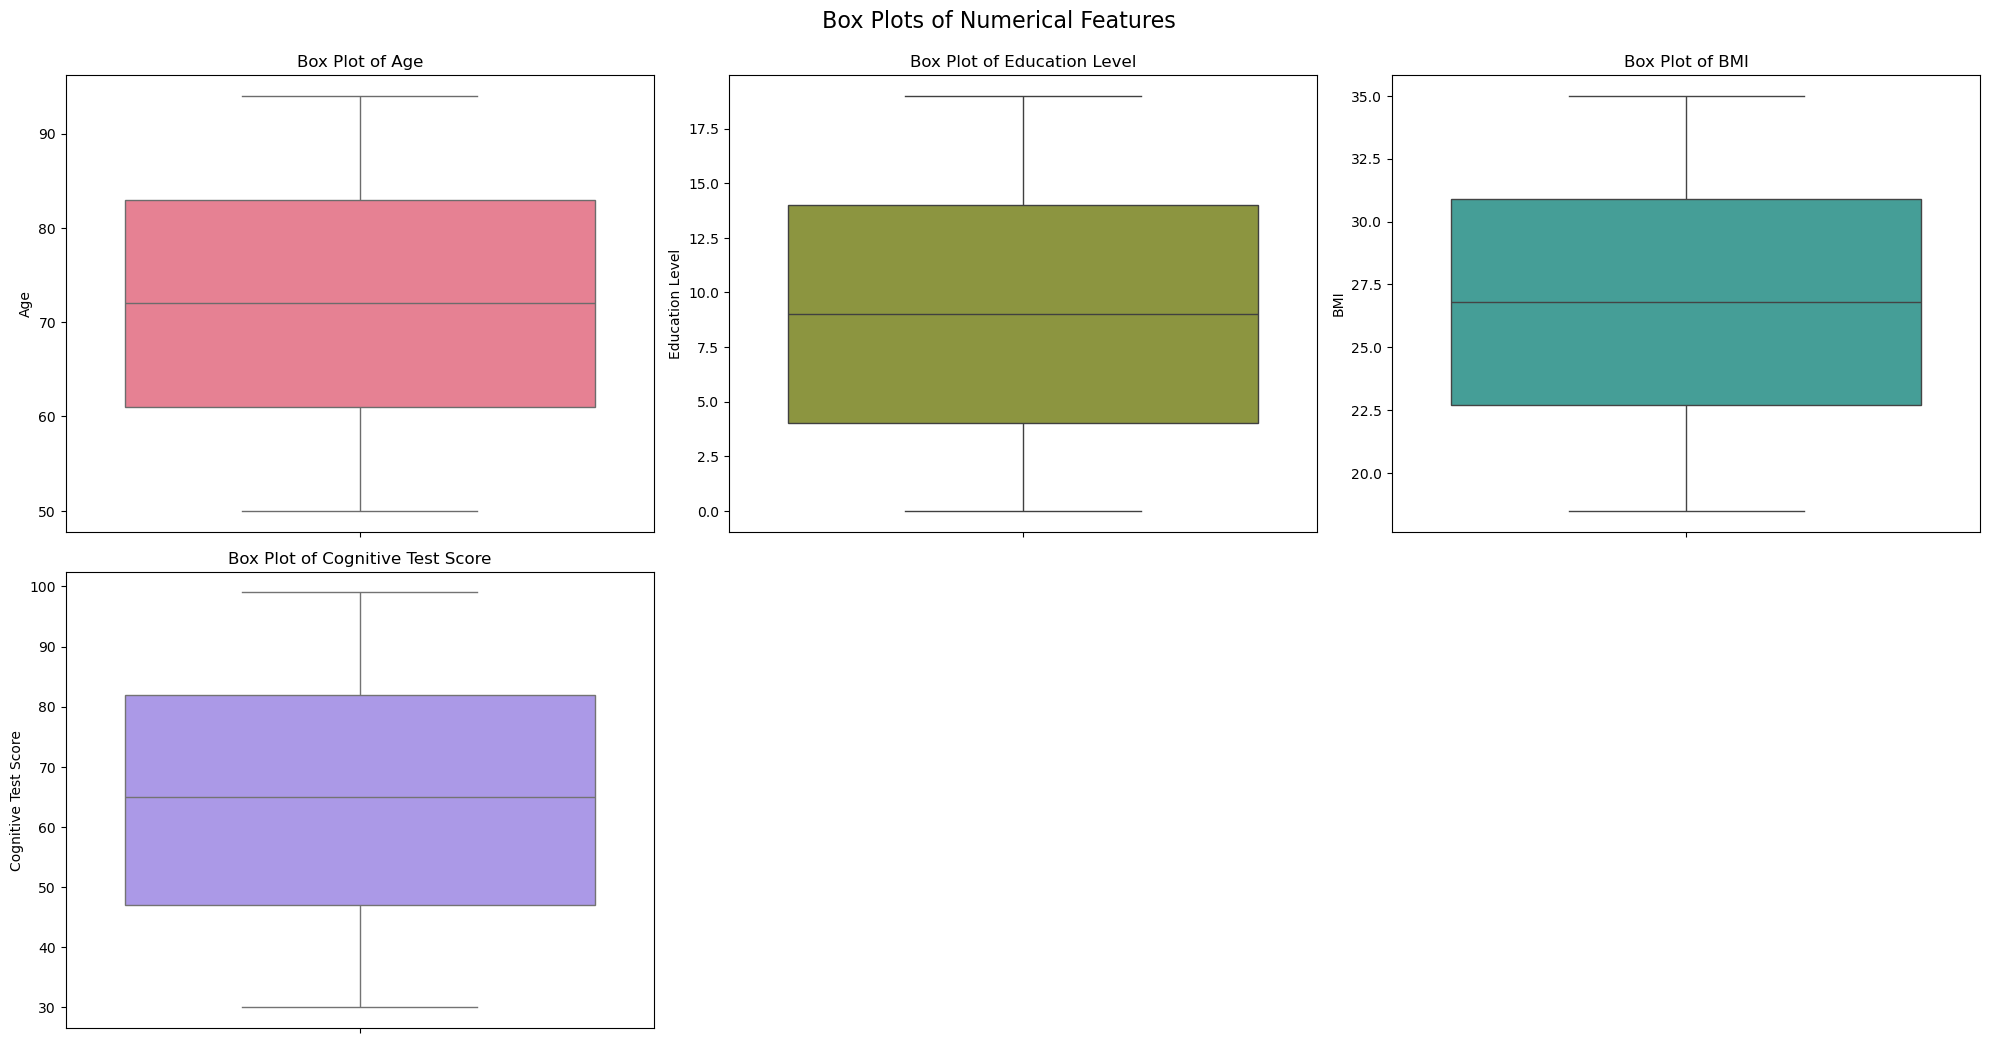

In [25]:
# Get numerical columns
numerical_columns = df_Alzheimer.select_dtypes(include=[np.number]).columns

# Print numerical column names
print(" Numerical Columns:")
for col in numerical_columns:
    print(f" - {col}")

# Visualise Distribution Plots
plt.figure(figsize=(20, 15))
colors = sns.color_palette("husl", len(numerical_columns))  # unique colors

# Create subplots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_Alzheimer[col], kde=True, color=colors[i - 1])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle(" Distribution of Numerical Features", fontsize=16, y=1.02)
plt.show()

# Visualise Box Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_Alzheimer[col], color=colors[i - 1])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.suptitle(" Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()


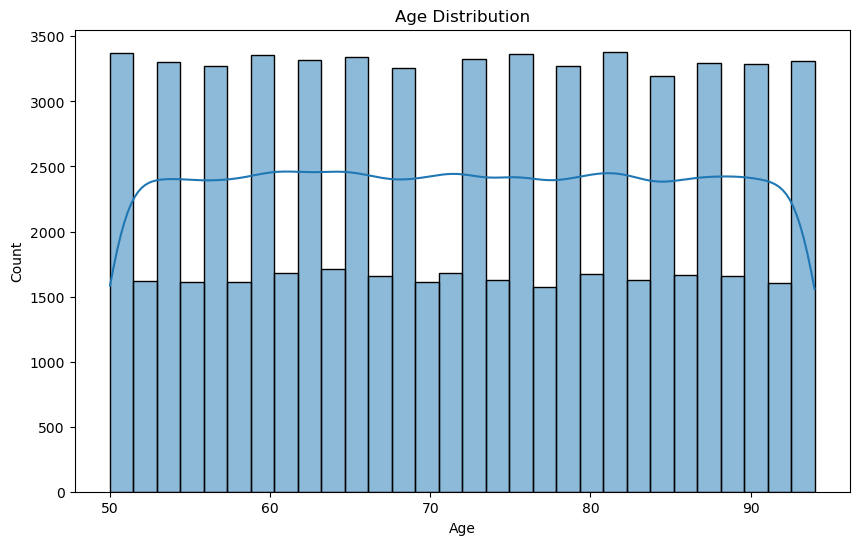

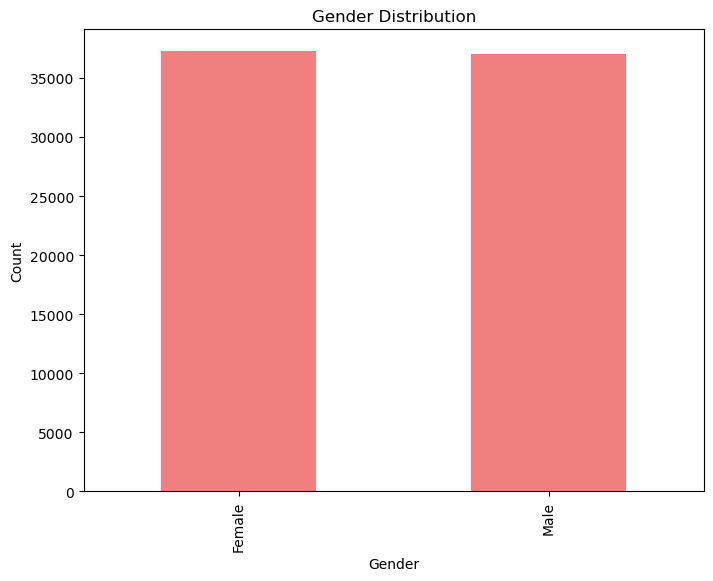

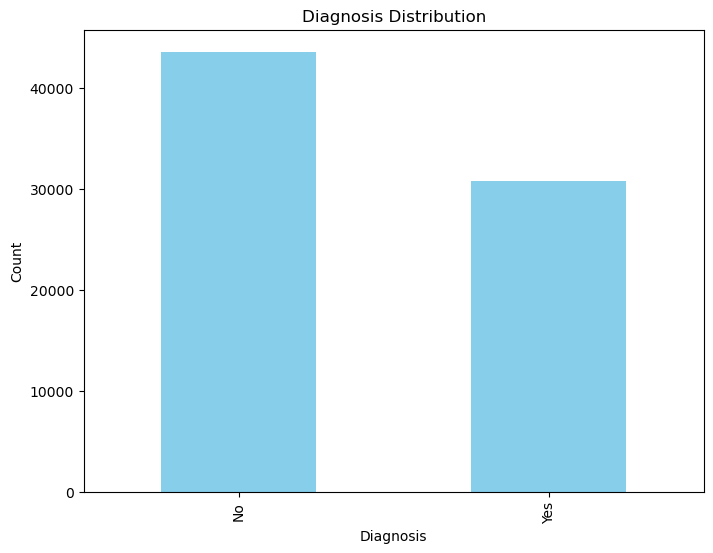

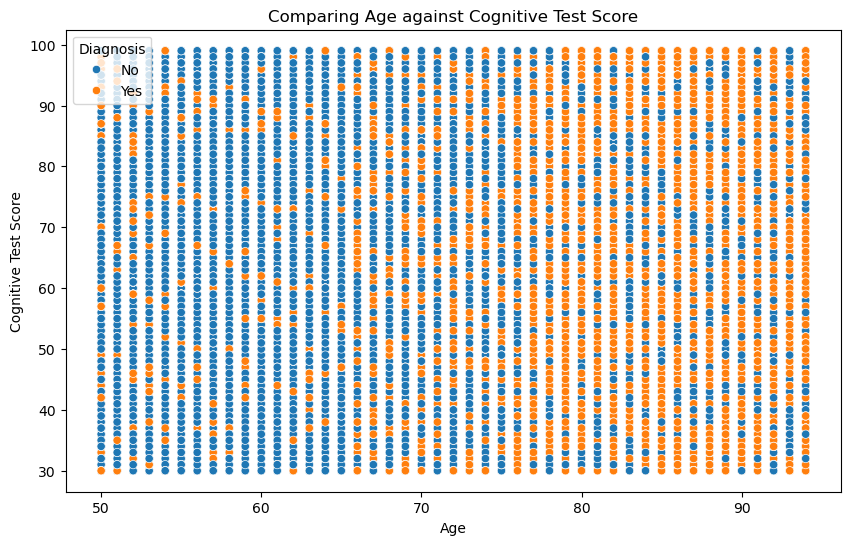

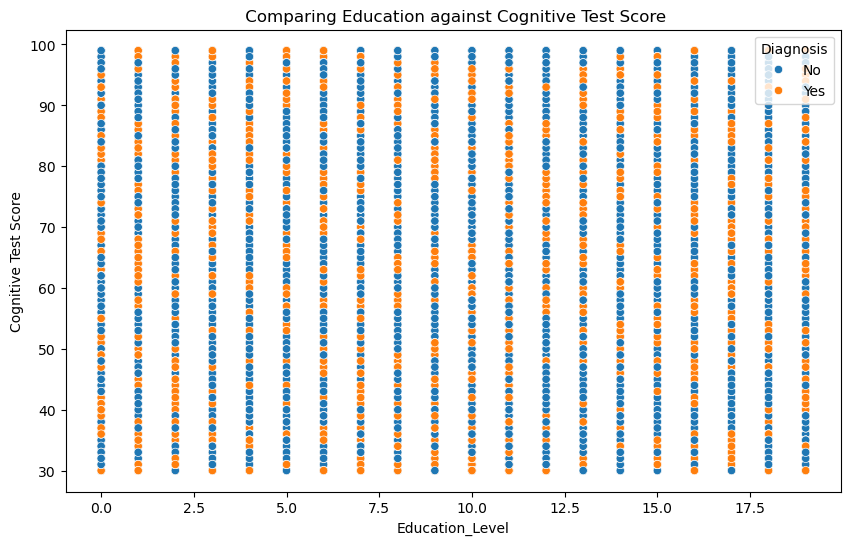

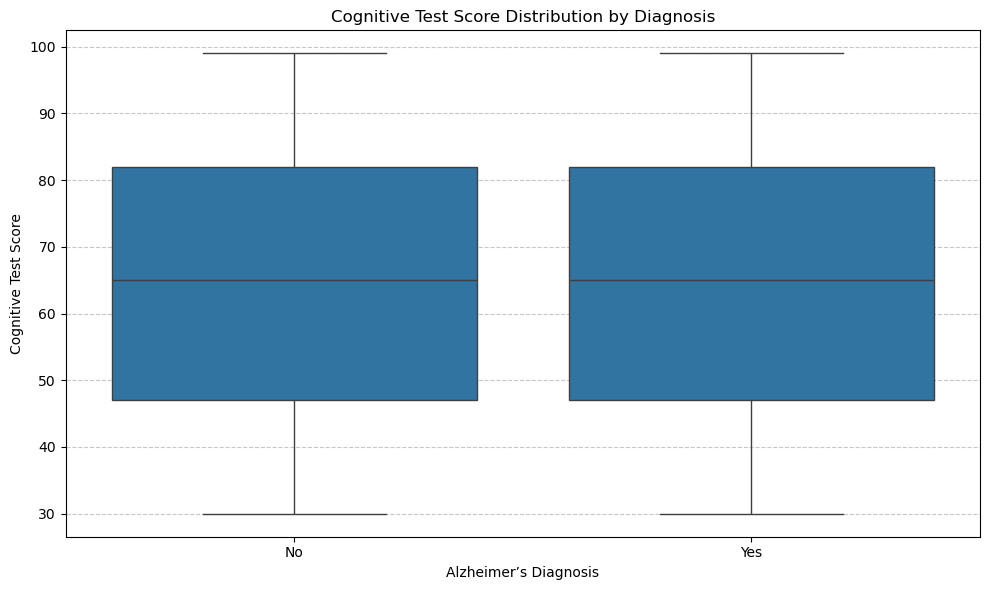

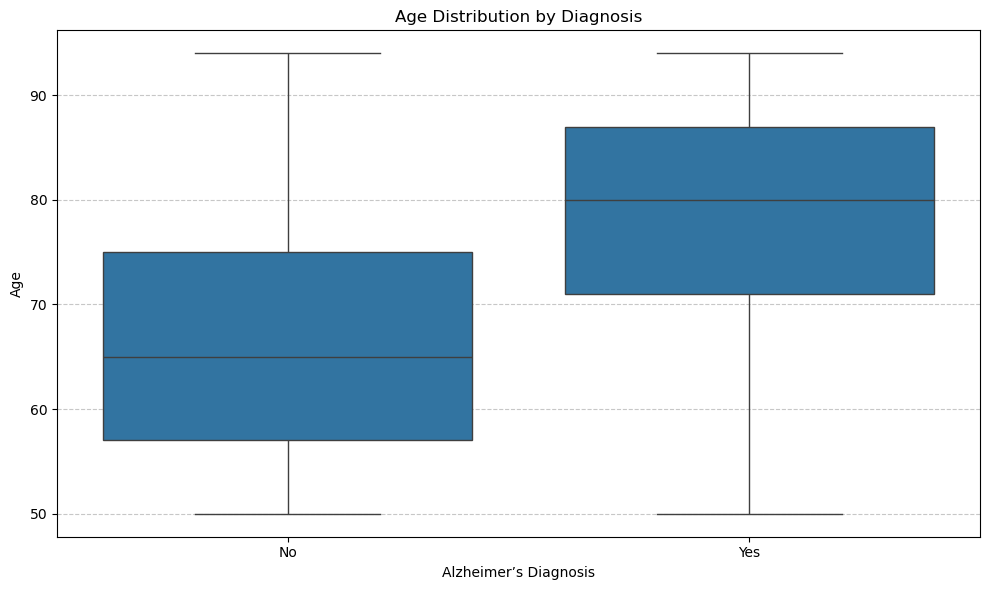

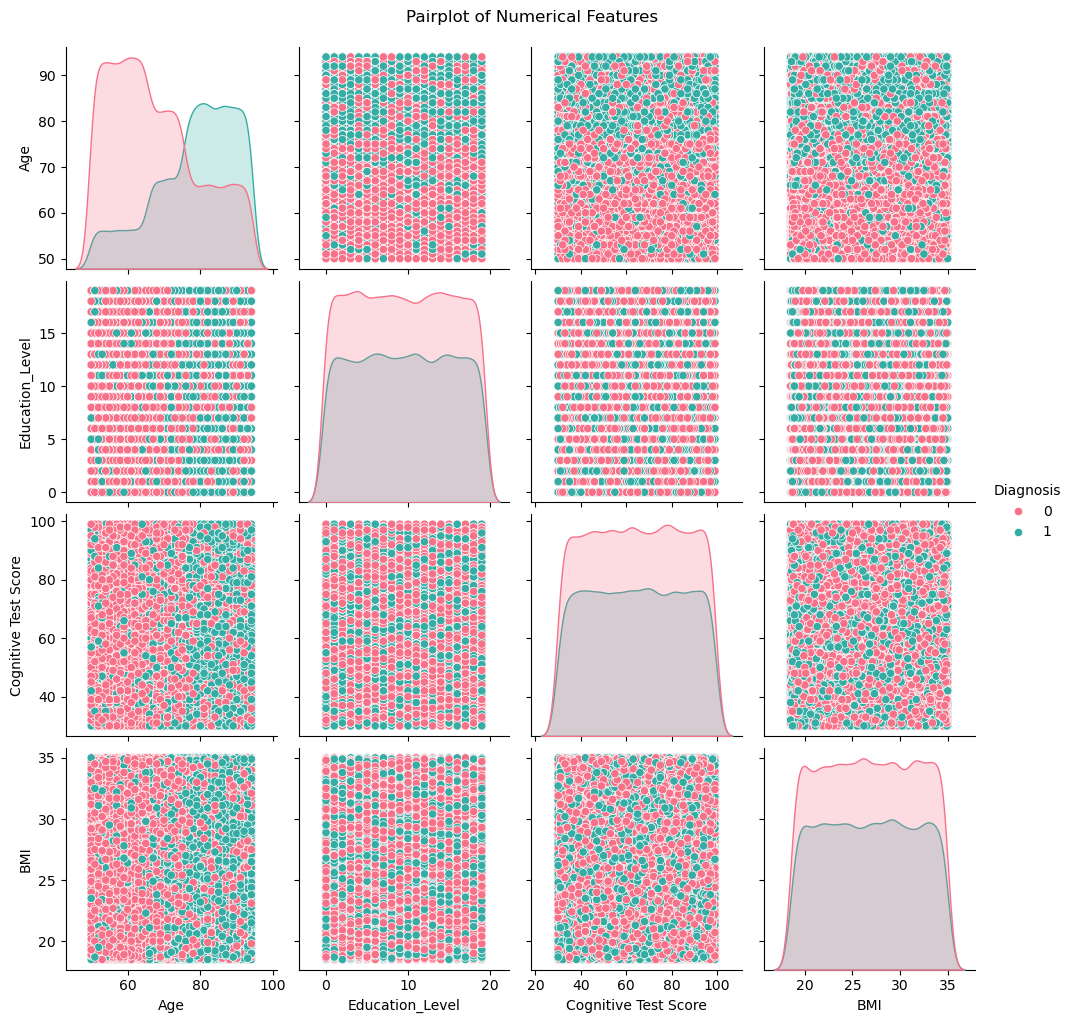

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy and rename columns temporarily
df_Alzheimer_temp = df_Alzheimer.copy()
df_Alzheimer_temp['Diagnosis'] = df_Alzheimer_temp['Alzheimer’s Diagnosis']
df_Alzheimer_temp['Education_Level'] = df_Alzheimer_temp['Education Level']

# Visualise Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_Alzheimer_temp['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Visualise Gender distribution
plt.figure(figsize=(8, 6))
df_Alzheimer_temp['Gender'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# Visualise Diagnosis distribution
plt.figure(figsize=(8, 6))
df_Alzheimer_temp['Diagnosis'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Diagnosis Distribution')
plt.ylabel('Count')
plt.show()

# Visualise Age vs Cognitive Score scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cognitive Test Score', hue='Diagnosis', data=df_Alzheimer_temp)
plt.title('Comparing Age against Cognitive Test Score')
plt.show()

# Visualise Education vs Cognitive Score scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education_Level', y='Cognitive Test Score', hue='Diagnosis', data=df_Alzheimer_temp)
plt.title(' Comparing Education against Cognitive Test Score')
plt.show()

# Visualise Cognitive Score distribution by Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alzheimer’s Diagnosis', y='Cognitive Test Score', data=df_Alzheimer_temp)
plt.title('Cognitive Test Score Distribution by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

# Visualise Age distribution by Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alzheimer’s Diagnosis', y='Age', data=df_Alzheimer_temp)
plt.title('Age Distribution by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


# Visualise Pairplot for selected key features
selected_cols = ['Age', 'Education_Level', 'Cognitive Test Score', 'BMI', 'Diagnosis']
df_pair = df_Alzheimer_temp[selected_cols].copy()
df_pair['Diagnosis'] = df_pair['Diagnosis'].map({'No': 0, 'Yes': 1})  # encode temporarily

sns.pairplot(df_pair, hue='Diagnosis', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Drop temporary column
df_Alzheimer_temp.drop(columns=['Education_Level'], inplace=True)


# Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df_Alzheimer.copy()

# Identify all categorical (object type) columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply LabelEncoder to ALL categorical columns (including Country, Smoking Status, etc.)
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

#  Check encoded data
print(" Encoded DataFrame shape:", df_encoded.shape)

 Encoded DataFrame shape: (74283, 25)


In [136]:
# Display the first few rows of the encoded DataFrame
df_encoded.head(20)

Country  Age  Gender  Education Level   BMI  Physical Activity Level  \
0        16   90       1                1  33.0                        2   
1         0   72       1                7  29.9                        2   
2        14   86       0               19  22.9                        0   
3         4   53       1               17  31.2                        1   
4        17   58       0                3  30.0                        0   
5        16   55       0                2  34.0                        2   
6        15   91       0               18  24.1                        0   
7         4   67       0               11  23.6                        1   
8         4   84       0               11  22.0                        0   
9         6   72       0               11  32.4                        2   
10       17   80       0                2  31.6                        2   
11       18   69       1                2  19.8                        1   
12        3   56       0               11  35.0                        2   
13        7   61       1               15  22.9                        0   
14        8   86       1               10  32.1                        1   
15        3   53       0                6  29.1                        1   
16       19   61       0               13  33.1                        2   
17        7   64       1                2  27.9                        1   
18        7   51       1               12  31.7                        1   
19       12   60       1                1  28.0                        2   

    Smoking Status  Alcohol Consumption  Diabetes  Hypertension  ...  \
0                2                    1         0             0  ...   
1                1                    0         0             0  ...   
2                0                    1         0             1  ...   
3                2                    2         1             0  ...   
4                1                    0         1             0  ...   
5                0                    0         0             0  ...   
6                1                    1         0             1  ...   
7                0                    2         0             0  ...   
8                0                    2         0             0  ...   
9                2                    1         0             1  ...   
10               0                    0         0             1  ...   
11               2                    1         0             0  ...   
12               0                    0         1             1  ...   
13               1                    2         0             0  ...   
14               2                    0         0             0  ...   
15               2                    1         0             0  ...   
16               1                    0         0             1  ...   
17               1                    1         0             0  ...   
18               2                    0         1             1  ...   
19               2                    0         0             0  ...   

    Dietary Habits  Air Pollution Exposure  Employment Status  Marital Status  \
0                1                       0                  1               1   
1                1                       2                  2               2   
2                0                       2                  0               1   
3                1                       2                  1               1   
4                2                       0                  0               0   
5                1                       1                  1               0   
6                0                       0                  0               2   
7                2                       1                  2               2   
8                0                       0                  0               1   
9                0                       0                  0               1   
10 

In [138]:
# Generate descriptive statistics after encoding
df_encoded.describe()

Country           Age        Gender  Education Level  \
count  74283.000000  74283.000000  74283.000000     74283.000000   
mean       9.459863     71.964703      0.498553         9.487514   
std        5.762555     12.980748      0.500001         5.757020   
min        0.000000     50.000000      0.000000         0.000000   
25%        4.000000     61.000000      0.000000         4.000000   
50%        9.000000     72.000000      0.000000         9.000000   
75%       14.000000     83.000000      1.000000        14.000000   
max       19.000000     94.000000      1.000000        19.000000   

                BMI  Physical Activity Level  Smoking Status  \
count  74283.000000             74283.000000    74283.000000   
mean      26.780639                 0.997617        0.997644   
std        4.764679                 0.816556        0.817594   
min       18.500000                 0.000000        0.000000   
25%       22.700000                 0.000000        0.000000   
50%       26.800000                 1.000000        1.000000   
75%       30.900000                 2.000000        2.000000   
max       35.000000                 2.000000        2.000000   

       Alcohol Consumption      Diabetes  Hypertension  ...  Dietary Habits  \
count         74283.000000  74283.000000  74283.000000  ...    74283.000000   
mean              0.998290      0.198646      0.298171  ...        0.996783   
std               0.817168      0.398983      0.457458  ...        0.817097   
min               0.000000      0.000000      0.000000  ...        0.000000   
25%               0.000000      0.000000      0.000000  ...        0.000000   
50%               1.000000      0.000000      0.000000  ...        1.000000   
75%               2.000000      0.000000      1.000000  ...        2.000000   
max               2.000000      1.000000      1.000000  ...        2.000000   

       Air Pollution Exposure  Employment Status  Marital Status  \
count            74283.000000       74283.000000    74283.000000   
mean                 0.997510           1.000619        0.999569   
std                  0.817363           0.816782        0.813132   
min                  0.000000           0.000000        0.000000   
25%                  0.000000           0.000000        0.000000   
50%                  1.000000           1.000000        1.000000   
75%                  2.000000           2.000000        2.000000   
max                  2.000000           2.000000        2.000000   

       Genetic Risk Factor (APOE-ε4 allele)  Social Engagement Level  \
count                          74283.000000             74283.000000   
mean                               0.198188                 1.002181   
std                                0.398637                 0.816779   
min                                0.000000                 0.000000   
25%                                0.000000                 0.000000   
50%                                0.000000                 1.000000   
75%                                0.000000                 2.000000   
max                                1.000000                 2.000000   

       Income Level  Stress Levels  Urban vs Rural Living  \
count  74283.000000   74283.000000           74283.000000   
mean       0.996150       1.002948               0.499172   
std        0.815569       0.816752               0.500003   
min        0.000000       0.000000               0.000000   
25%        0.000000       0.000000               0.000000   
50%        1.000000       1.000000               0.000000   
75%        2.000000       2.000000               1.000000   
max        2.000000       2.000000               1.000000   

       Alzheimer’s Diagnosis  
count           74283.000000  
mean                0.413459  
std                 0.492457  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000  

[8 rows x 25 colum

In [140]:
# Check for missing value
print(df_encoded.isnull().sum())

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

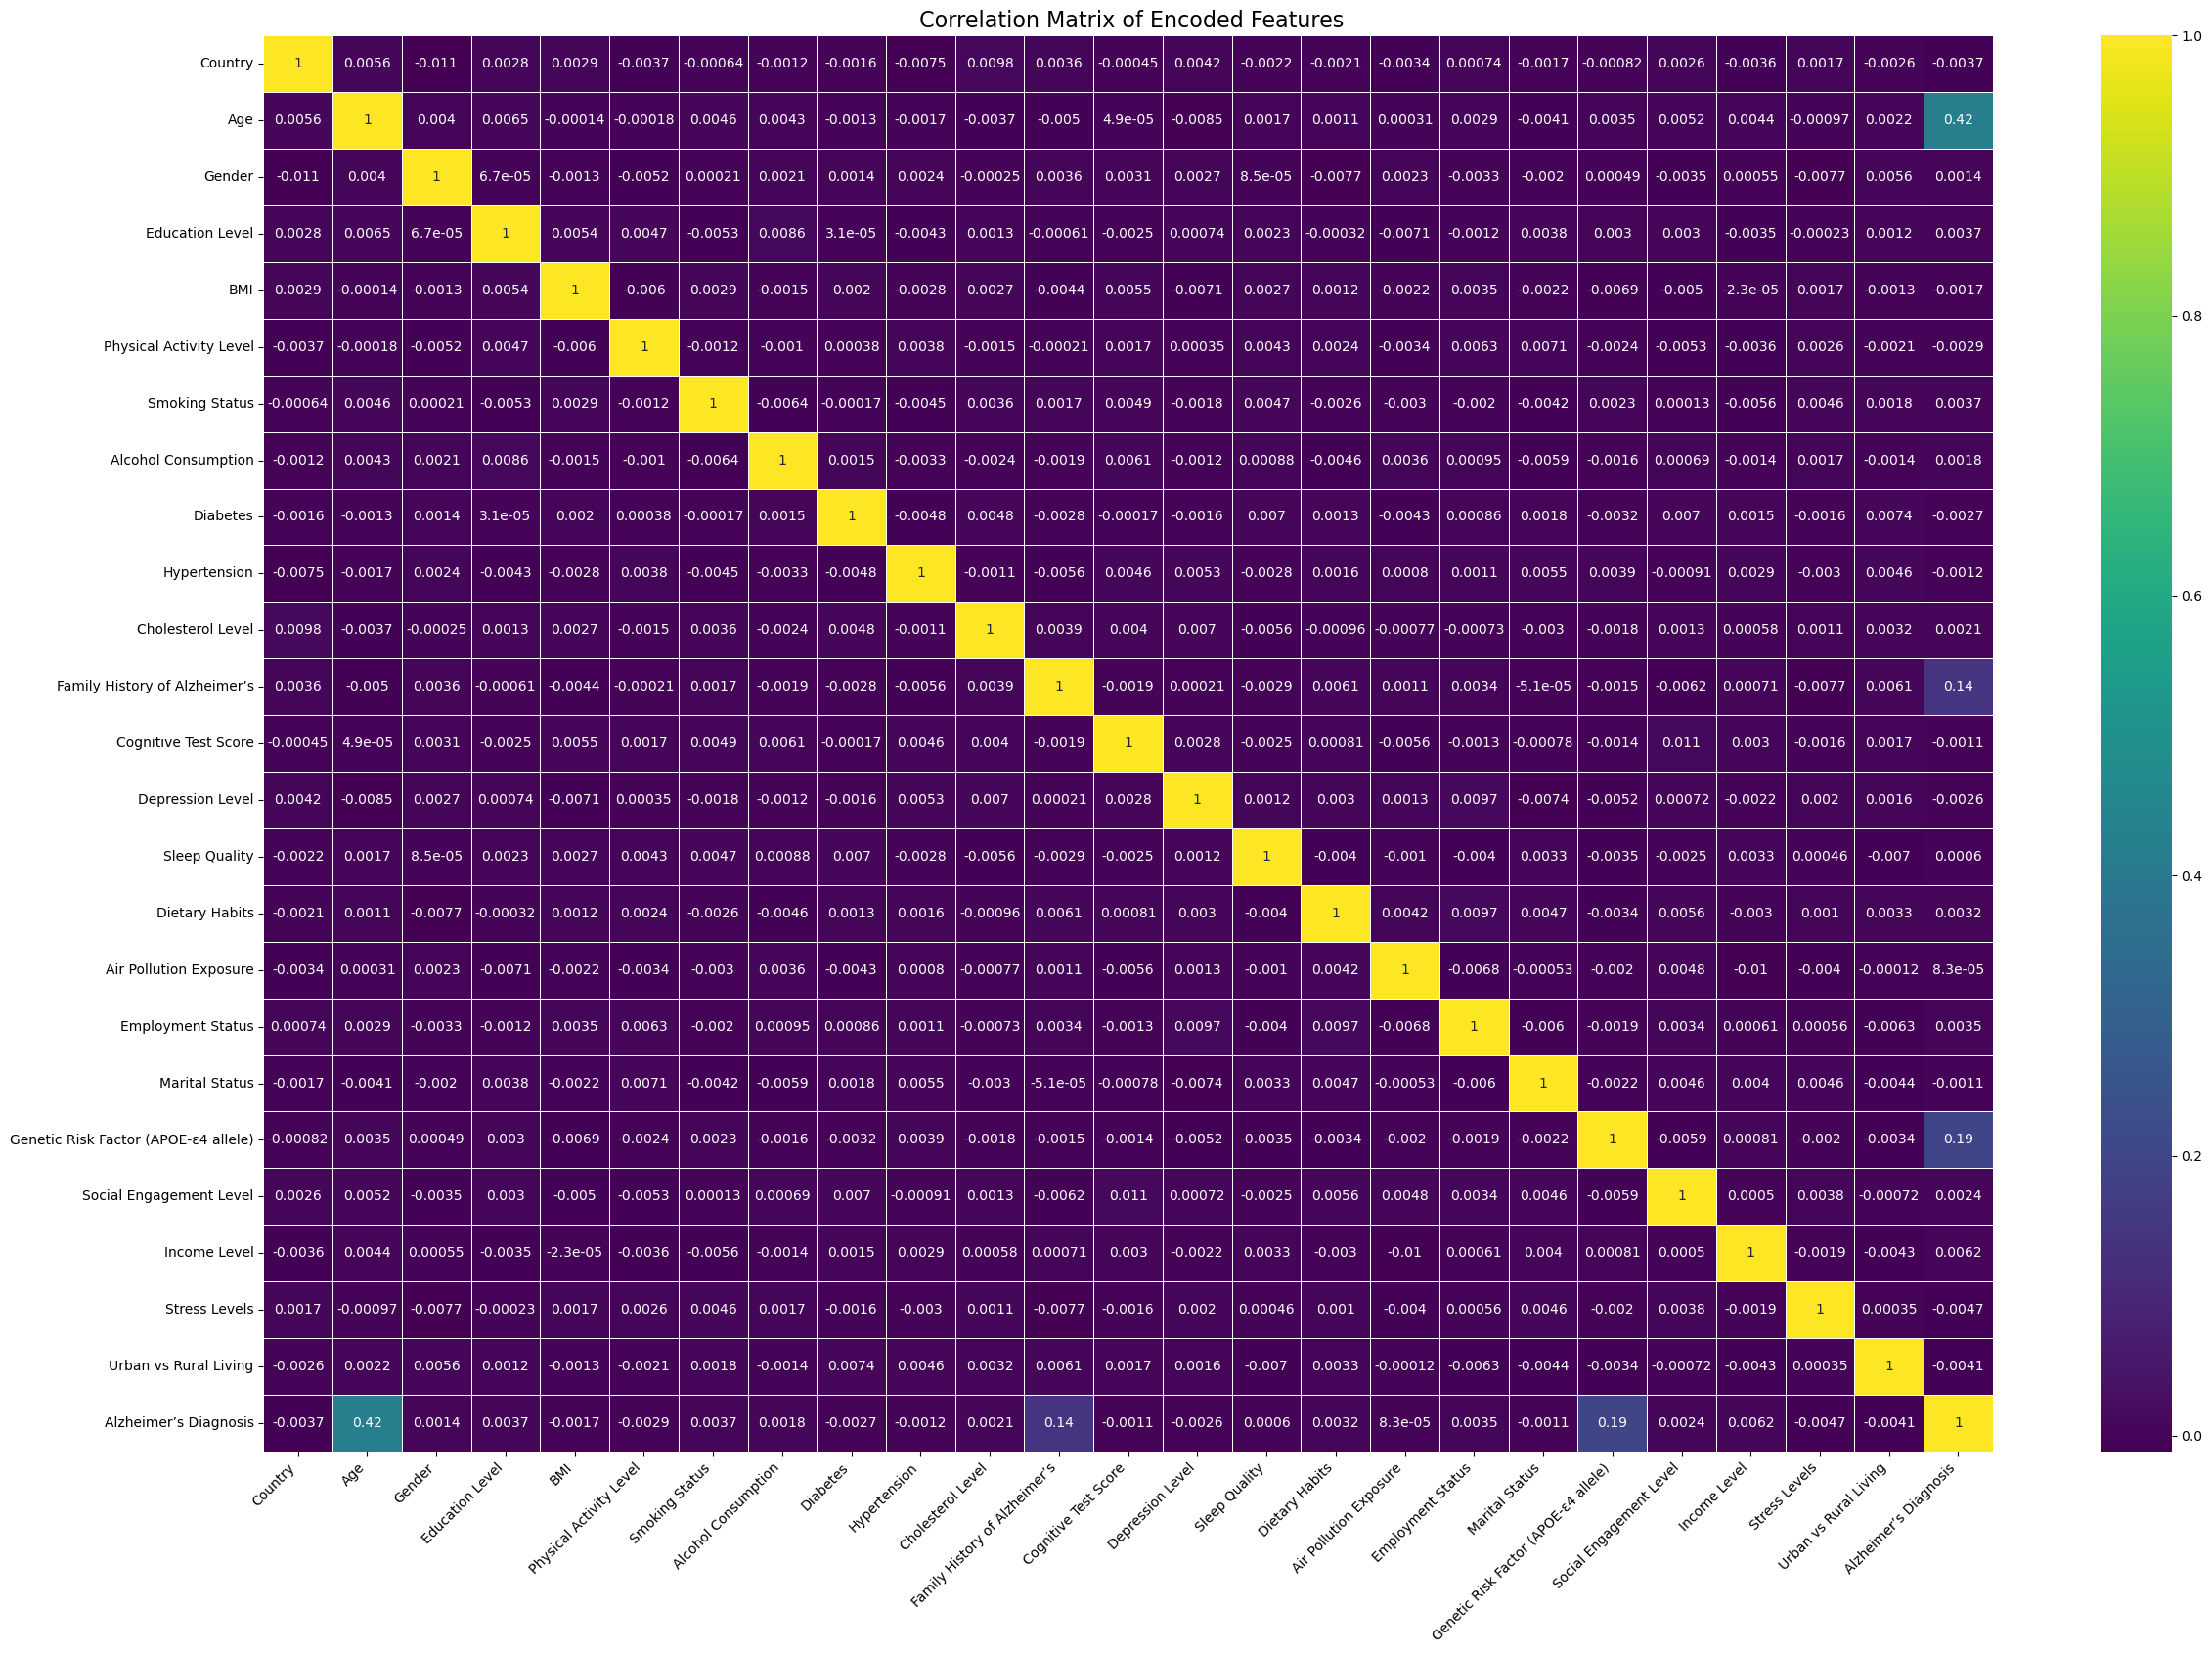

In [142]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(25, 17))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title(" Correlation Matrix of Encoded Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [144]:
# Calculate correlations between features and Alzheimer's Diagnosis
correlations = df_encoded.corr()['Alzheimer’s Diagnosis'].sort_values(ascending=False)

# Print top correlated features with Alzheimer's Diagnosis
print(" Top correlated features with Alzheimer’s Diagnosis:\n")
print(correlations.head(6))

 Top correlated features with Alzheimer’s Diagnosis:

Alzheimer’s Diagnosis                   1.000000
Age                                     0.419923
Genetic Risk Factor (APOE-ε4 allele)    0.194484
Family History of Alzheimer’s           0.140885
Income Level                            0.006209
Education Level                         0.003732
Name: Alzheimer’s Diagnosis, dtype: float64


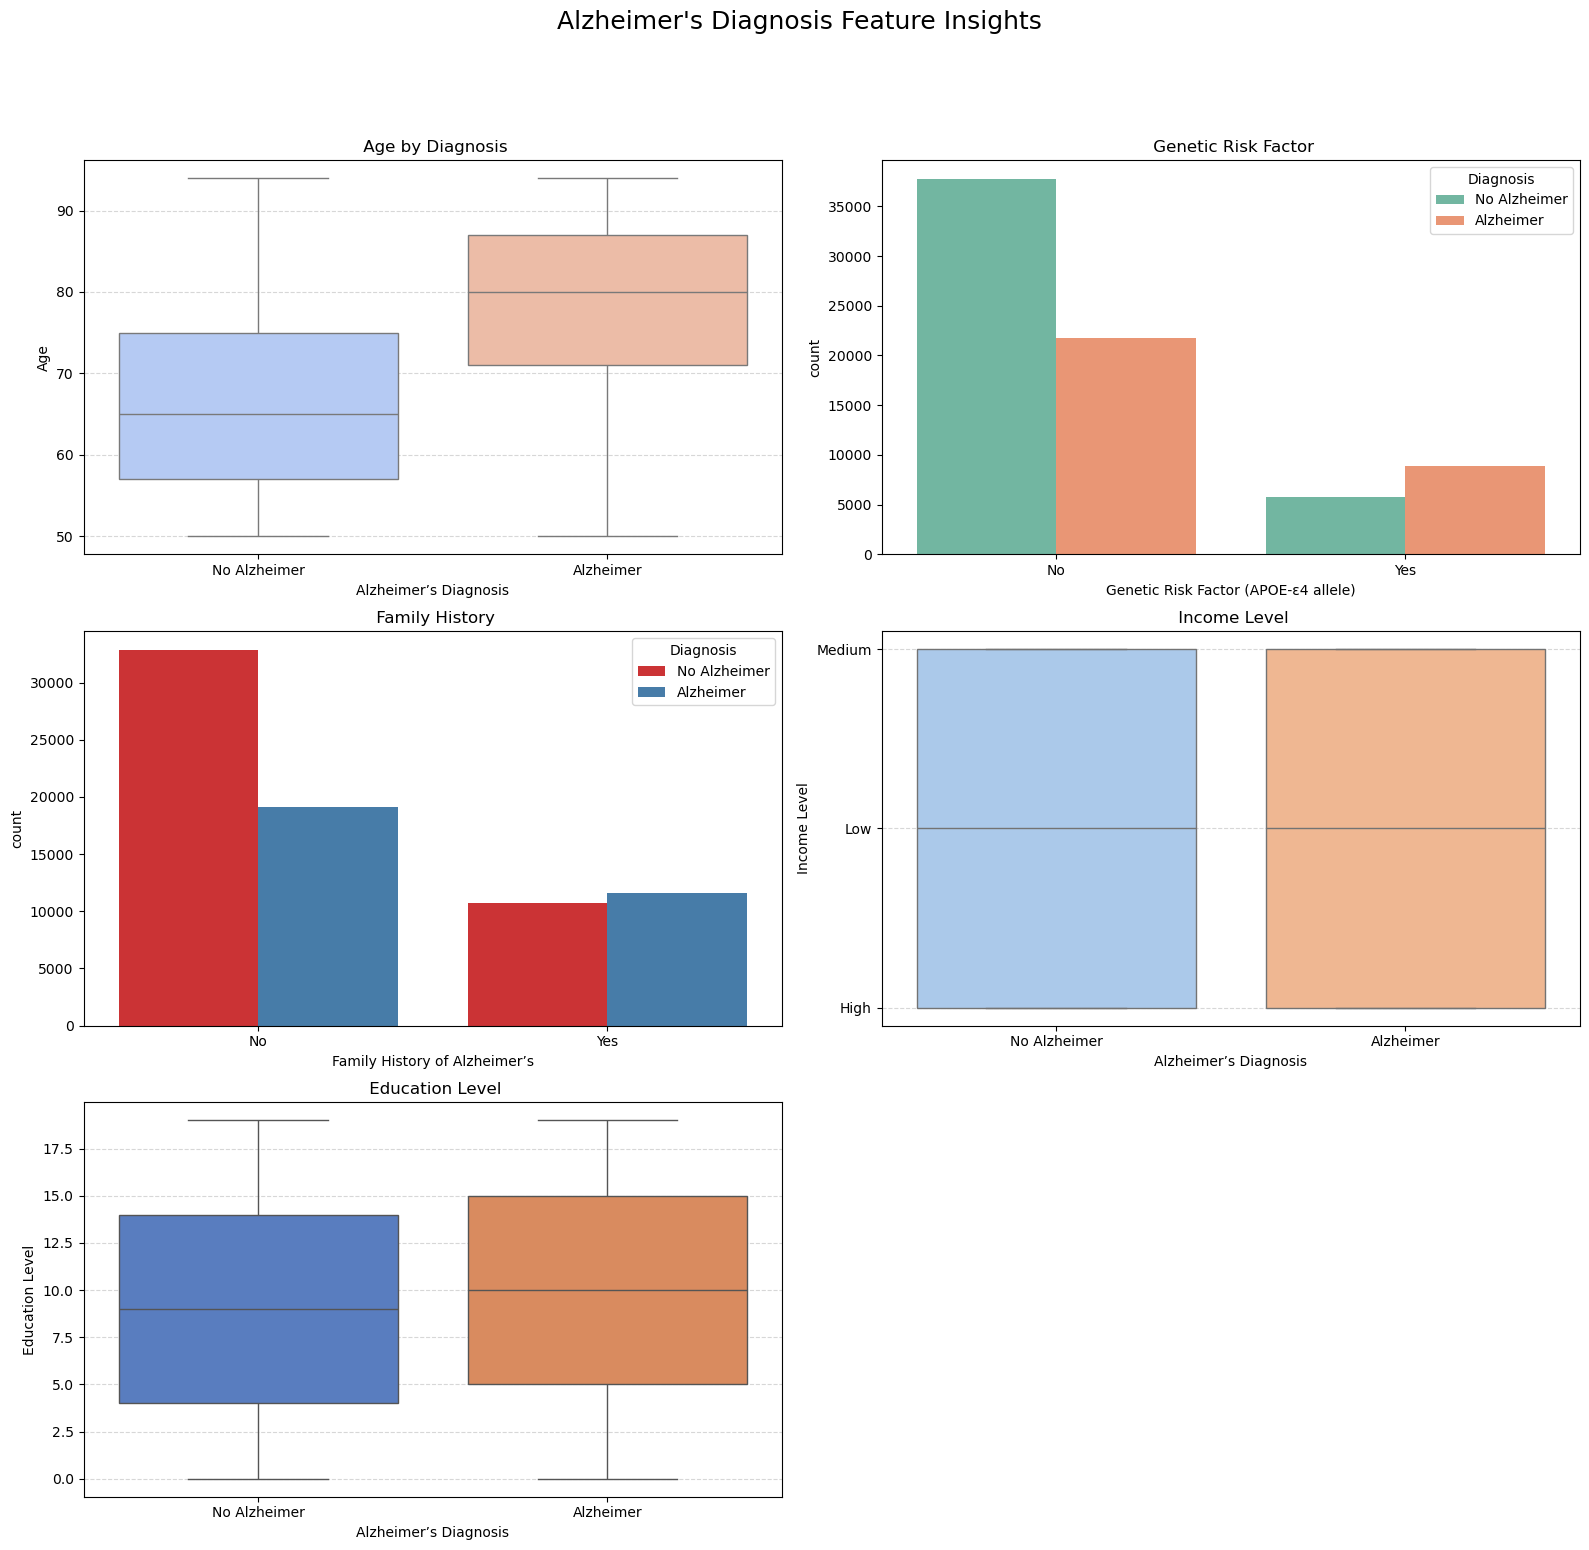

In [152]:
# Set up the figure with subplots for feature insights 
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle(" Alzheimer's Diagnosis Feature Insights", fontsize=18, y=1.03)

# Visualise Age vs Diagnosis (Boxplot)
sns.boxplot(data=df_Alzheimer, x='Alzheimer’s Diagnosis', y='Age', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title(" Age by Diagnosis")
axes[0, 0].set_xticklabels(['No Alzheimer', 'Alzheimer'])
axes[0, 0].set_ylabel('Age')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Visualise Genetic Risk Factor by Diagnosis (Countplot)
sns.countplot(data=df_Alzheimer, x='Genetic Risk Factor (APOE-ε4 allele)', hue='Alzheimer’s Diagnosis', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title(" Genetic Risk Factor")
axes[0, 1].legend(title='Diagnosis', labels=['No Alzheimer', 'Alzheimer'])

# Visualise Family History vs Diagnosis (Countplot)
sns.countplot(data=df_Alzheimer, x='Family History of Alzheimer’s', hue='Alzheimer’s Diagnosis', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title(" Family History")
axes[1, 0].legend(title='Diagnosis', labels=['No Alzheimer', 'Alzheimer'])

# Visualise Income Level by Diagnosis (Boxplot)
sns.boxplot(data=df_Alzheimer, x='Alzheimer’s Diagnosis', y='Income Level', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title(" Income Level")
axes[1, 1].set_xticklabels(['No Alzheimer', 'Alzheimer'])
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Visualise Education Level by Diagnosis (Boxplot)
sns.boxplot(data=df_Alzheimer, x='Alzheimer’s Diagnosis', y='Education Level', palette='muted', ax=axes[2, 0])
axes[2, 0].set_title(" Education Level")
axes[2, 0].set_xticklabels(['No Alzheimer', 'Alzheimer'])
axes[2, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [46]:
# Select top features for Alzheimer's Diagnosis analysis
top_features = [
    "Age",
    "Genetic Risk Factor (APOE-ε4 allele)",
    "Family History of Alzheimer’s",
    "Income Level",
    "Education Level"
]

# Group by Alzheimer's Diagnosis and calculate mean for top features
grouped_means = df_encoded.groupby("Alzheimer’s Diagnosis")[top_features].mean().T

# Rename columns for readability
grouped_means.columns = ['No Alzheimer', 'Alzheimer']

# Display group-wise means for top features
print(" Group-wise Means for Top Features:\n")
print(grouped_means)



 Group-wise Means for Top Features:

                                      No Alzheimer  Alzheimer
Age                                      67.388203  78.457005
Genetic Risk Factor (APOE-ε4 allele)      0.133096   0.290528
Family History of Alzheimer’s             0.245720   0.376811
Income Level                              0.991898   1.002181
Education Level                           9.469474   9.513105


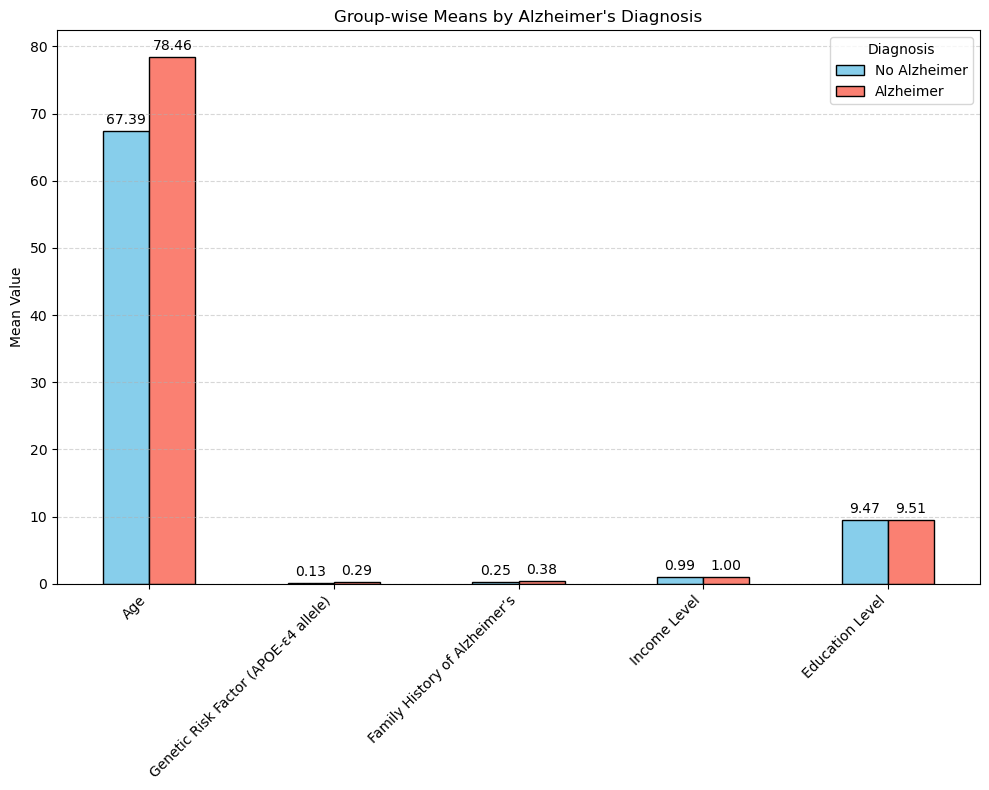

In [48]:
# Create bar plot with value annotations
ax = grouped_means.plot(kind='bar', figsize=(10, 8), color=['skyblue', 'salmon'], edgecolor='black')

# Customize and display the plot
plt.title("Group-wise Means by Alzheimer's Diagnosis")
plt.ylabel("Mean Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Diagnosis")
plt.tight_layout()

# Add value annotations on top of bars
for container in ax.containers: ax.bar_label(container, fmt='%.2f', padding=3)

# Display the visual
plt.show()

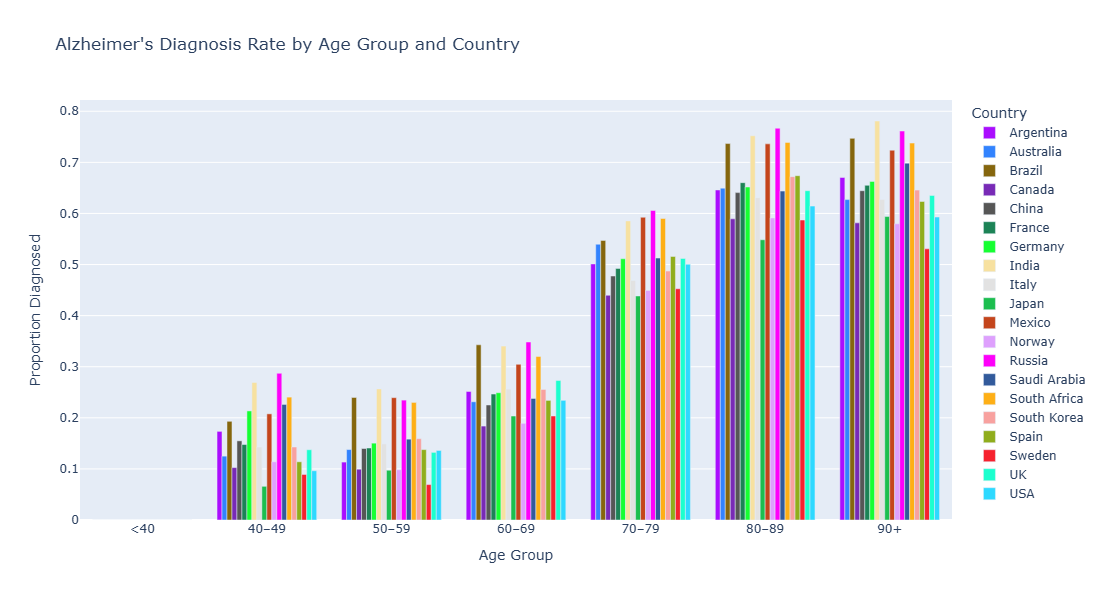

In [166]:
# Visualise 
import pandas as pd
import plotly.express as px

# Bin ages into groups
df_Alzheimer['Age_Group'] = pd.cut(df_Alzheimer['Age'], bins=[0, 40, 50, 60, 70, 80, 90, 100],
                                    labels=['<40', '40–49', '50–59', '60–69', '70–79', '80–89', '90+'])

# Group by Age Group and Country and calculate AD diagnosis rate
grouped = df_Alzheimer.groupby(['Age_Group', 'Country'])['Alzheimer’s Diagnosis'].value_counts(normalize=True).unstack().fillna(0)

# Reset index for Plotly
grouped = grouped.reset_index()

# Interactive grouped bar chart
fig = px.bar(grouped, x='Age_Group', y='Yes', color='Country', barmode='group',
             title="Alzheimer's Diagnosis Rate by Age Group and Country",
             labels={'Yes': 'Proportion Diagnosed'},
             color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(xaxis_title="Age Group", yaxis_title="Proportion Diagnosed", height=600)
fig.show()

# Feature Selection

In [53]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df_encoded.drop(columns=['Alzheimer’s Diagnosis'])
y = df_encoded['Alzheimer’s Diagnosis']

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply Variance Threshold
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X_scaled)
var_columns = X.columns[var_thresh.get_support()]

# Apply SelectKBest (e.g., top 15 features using ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=15)
X_kbest = selector.fit_transform(X_var, y)

# Get final selected feature names
selected_mask = selector.get_support()
selected_features = var_columns[selected_mask]

# Create a DataFrame with selected features
df_selected = pd.DataFrame(X_kbest, columns=selected_features)
df_selected['Alzheimer’s Diagnosis'] = y.values

# Print Output
print(" Final selected features after VarianceThreshold + SelectKBest:")
print(selected_features.tolist())
print(" Final dataset shape:", df_selected.shape)


 Final selected features after VarianceThreshold + SelectKBest:
['Country', 'Age', 'Education Level', 'Physical Activity Level', 'Smoking Status', 'Diabetes', 'Family History of Alzheimer’s', 'Depression Level', 'Dietary Habits', 'Employment Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']
 Final dataset shape: (74283, 16)


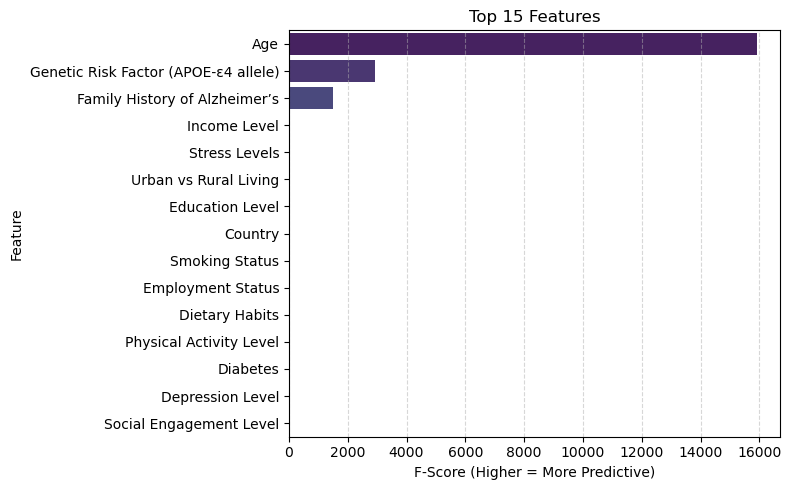

In [55]:
from sklearn.feature_selection import f_classif, SelectKBest

# Split features and target
X = df_encoded.drop(columns=['Alzheimer’s Diagnosis'])
y = df_encoded['Alzheimer’s Diagnosis']

# Apply SelectKBest using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to get scores for all
selector.fit(X, y)

# Get scores and feature names
scores = selector.scores_
features = X.columns

# Create DataFrame of scores
score_df = pd.DataFrame({'Feature': features, 'ANOVA F-Score': scores})
score_df = score_df.sort_values(by='ANOVA F-Score', ascending=False)

# Visualize top N features
top_n = 15
plt.figure(figsize=(8, 5))
sns.barplot(data=score_df.head(top_n), x='ANOVA F-Score', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Features')
plt.xlabel('F-Score (Higher = More Predictive)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [57]:
# All original feature names (excluding the target)
original_features = df_encoded.drop(columns=["Alzheimer’s Diagnosis"]).columns.tolist()

# Compute dropped features
dropped_features = list(set(original_features) - set(selected_features))

# Print dropped featues
print(" Dropped Features (not selected):")
for feat in sorted(dropped_features):
    print("-", feat)

# Print total count
print(f"\nTotal Dropped: {len(dropped_features)} / {len(original_features)}")


 Dropped Features (not selected):
- Air Pollution Exposure
- Alcohol Consumption
- BMI
- Cholesterol Level
- Cognitive Test Score
- Gender
- Hypertension
- Marital Status
- Sleep Quality

Total Dropped: 9 / 24


# Machine Learning Model(s) Training and Evaluation

In [60]:

# Define function for models training and evaluation
def train_multiple_models(df, target_col, test_size=0.2, random_state=42):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=300, random_state=random_state),
        "Decision Tree": DecisionTreeClassifier(random_state=random_state),
        "Logistic Regression": LogisticRegression(max_iter=500),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state, verbose=3)
    }
    # Prepare data for training and testing
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=random_state)

    # Store model results and trained models in a dictionary
    ml_results = {}
    trained_models = {}

    # Loop through each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Print model accuracy and classification report
        print(f"\n {name} Accuracy: {acc:.6f}")
        print(classification_report(y_test, y_pred, target_names=["No Alzheimer", "Alzheimer"]))

        ml_results[name] = acc
        trained_models[name] = model

    return ml_results, trained_models


In [62]:
# Train multiple ML models and store results and trained models
ml_results, trained_models = train_multiple_models(
    df=df_selected,
    target_col="Alzheimer’s Diagnosis"
)


 Random Forest Accuracy: 0.720805
              precision    recall  f1-score   support

No Alzheimer       0.76      0.77      0.76      8714
   Alzheimer       0.67      0.65      0.66      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857


 Decision Tree Accuracy: 0.638420
              precision    recall  f1-score   support

No Alzheimer       0.69      0.69      0.69      8714
   Alzheimer       0.56      0.56      0.56      6143

    accuracy                           0.64     14857
   macro avg       0.63      0.63      0.63     14857
weighted avg       0.64      0.64      0.64     14857


 Logistic Regression Accuracy: 0.712257
              precision    recall  f1-score   support

No Alzheimer       0.74      0.79      0.76      8714
   Alzheimer       0.67      0.60      0.63      6143

    accuracy                           0.71     14857
   macro avg     

In [64]:
# Define a function to plot the confusion matrix for model(s) classification reports 
def plot_confusion_matrices(trained_models, X_test, y_test, target_names=["No Alzheimer", "Alzheimer"]):

    # Evaluate each trained model using test data
    for name, model in trained_models.items():
        y_pred = model.predict(X_test)  # Make predictions on test data
        cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
        
        # Plot confusion matrix as a heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=target_names, yticklabels=target_names)
        plt.title(f' Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()


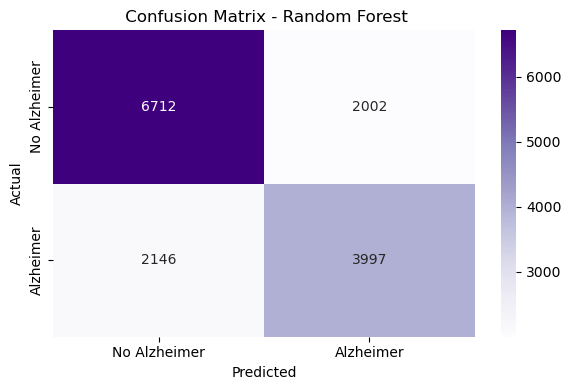

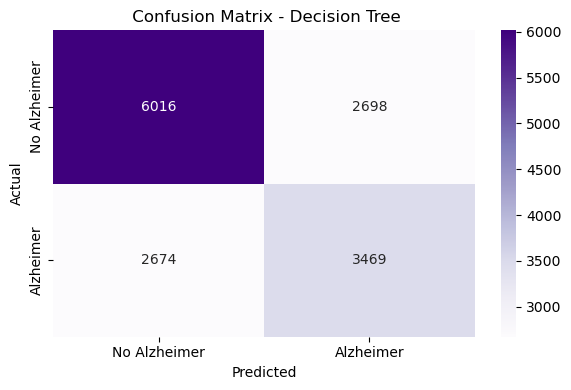

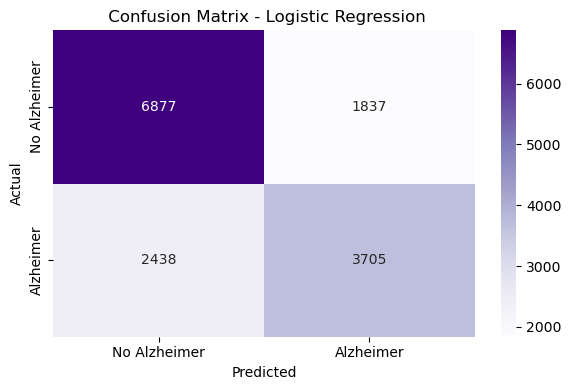

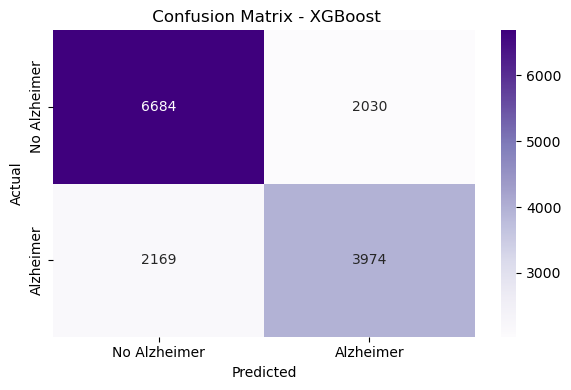

In [66]:
# Prepare test data again (same as used for training)
X = df_selected.drop(columns=["Alzheimer’s Diagnosis"])
y = df_selected["Alzheimer’s Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Plot confusion matrices for ML Models
plot_confusion_matrices(trained_models, X_test, y_test)


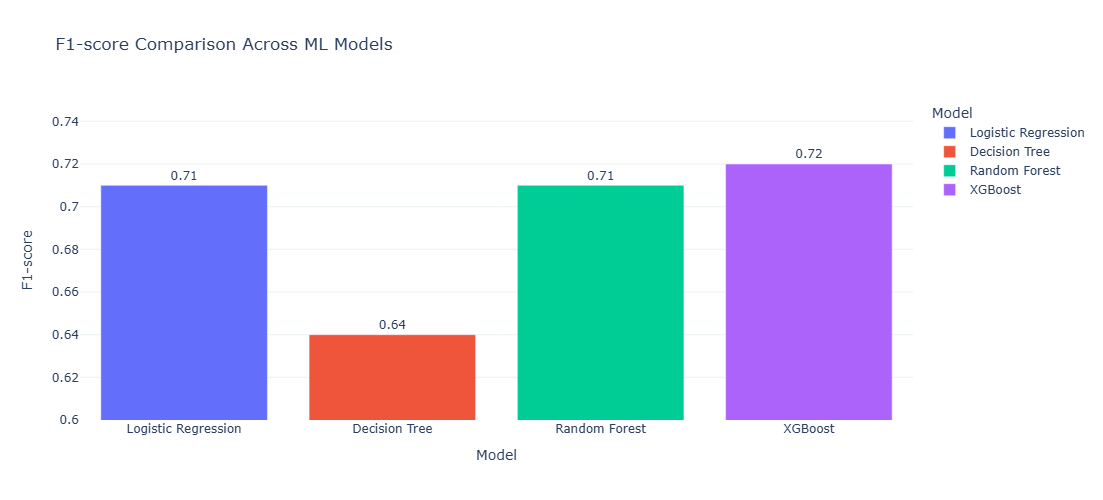

In [68]:
import pandas as pd
import plotly.express as px

# Define F1-scores for ML models
ml_f1_results = {
    "Logistic Regression": 0.71,
    "Decision Tree": 0.64,
    "Random Forest": 0.71,
    "XGBoost": 0.72
}

# Convert F1-scores to DataFrame
ml_f1_df = pd.DataFrame(list(ml_f1_results.items()), columns=["Model", "F1-score"])

# Create interactive bar chart for F1-score comparison
fig = px.bar(
    ml_f1_df,
    x="Model",
    y="F1-score",
    text=ml_f1_df["F1-score"].round(4),
    color="Model",
    title="F1-score Comparison Across ML Models",
    range_y=[0.6, 0.75],
    height=500
)

# Improve chart readability
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis_title="F1-score",
    xaxis_title="Model",
    template="plotly_white"
)

# Display the interactive chart
fig.show()


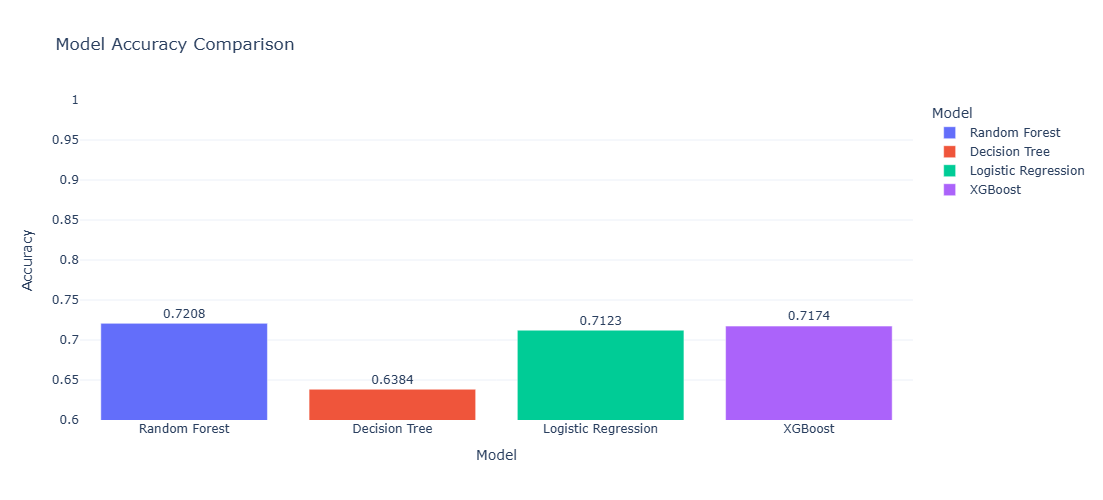

In [168]:
# Create and visualise a bar chart to compare ML models accuracies

# Convert ML model results to DataFrame
ml_results_df = pd.DataFrame(list(ml_results.items()), columns=["Model", "Accuracy"])

# Create an interactive bar chart to visualise ML model's accuracy comparison
fig = px.bar(
    ml_results_df,
    x="Model",
    y="Accuracy",
    text=ml_results_df["Accuracy"].round(4),
    color="Model",
    title=" Model Accuracy Comparison",
    range_y=[0.6, 1],
    height=500
)

# Enhance chart layout for better readability
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis_title="Accuracy",
    xaxis_title="Model",
    template="plotly_white"
)

# Display the interactive chart
fig.show()


In [72]:

# Retrieve the top-performing ML models based on a specified metric
def get_top_models(ml_results, metric="accuracy", top_n=2):
  
    model_scores = {} # Initialize an empty dictionary to store model scores

   # Iterate through model results 
    for name, val in ml_results.items():
        if isinstance(val, dict) and metric in val:
            model_scores[name] = val[metric]
        elif isinstance(val, (float, int)) and metric == "accuracy":
            model_scores[name] = val

    if not model_scores:
        print(f" No models found with metric: {metric}")
        return []

    # Sort models by score in descending order
    sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

    # Print the top models with their scores
    print(f"\n Top {top_n} Models by {metric.capitalize()}:")
    for i, (model, score) in enumerate(sorted_models[:top_n], 1):
        print(f"{i}. {model} → {metric.capitalize()}: {score:.4f}")

    return [model for model, _ in sorted_models[:top_n]] # Return the top N models

# Call the function to identify the top ML models 
top_models = get_top_models(ml_results, metric="accuracy", top_n=2)



 Top 2 Models by Accuracy:
1. Random Forest → Accuracy: 0.7208
2. XGBoost → Accuracy: 0.7174


In [74]:
from sklearn.model_selection import GridSearchCV

# Use the top_models in hyperparameter tuning loop
def tune_top_models(top_models, search_spaces, X_train, y_train, scoring='accuracy', cv=10):

    tuned_ml_results = {}

    # Iterate through top-performing models
    for name in top_models:
        if name not in search_spaces: # Check if they have a defined search space
            print(f" Skipping '{name}' — no search space defined.")
            continue

        model = search_spaces[name]["model"]
        param_grid = search_spaces[name]["params"]

        print(f"\n Tuning {name}...")

        # Perform grid search to tune hyperparameters for each model
        grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=2)
        grid.fit(X_train, y_train)
        tuned_ml_results[name] = {"best_estimator": grid.best_estimator_, "best_score": grid.best_score_, "best_params": grid.best_params_}

        # Print the best accuracy and hyperparameters for each model
        print(f" {name} Best Accuracy: {grid.best_score_:.4f}")
        print(f" Best Params: {grid.best_params_}")

    return tuned_ml_results


In [76]:

# Define hyperparameter search spaces for models
search_spaces = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [300, 500],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [5, 10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['liblinear', 'lbfgs']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [300, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0]
        }
    }
}


In [78]:
# Get top models
top_models = get_top_models(ml_results, metric="accuracy", top_n=2)

# Perform hyperparameter tuning
tuned_ml_results = tune_top_models(
    top_models=top_models,
    search_spaces=search_spaces,
    X_train=X_train,
    y_train=y_train,
    scoring='accuracy',
    cv=10
)



 Top 2 Models by Accuracy:
1. Random Forest → Accuracy: 0.7208
2. XGBoost → Accuracy: 0.7174

 Tuning Random Forest...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
 Random Forest Best Accuracy: 0.7245
 Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

 Tuning XGBoost...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
 XGBoost Best Accuracy: 0.7268
 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [80]:
# Create a summary DataFrame of tuned model results
summary = pd.DataFrame([
    {"Model": model, "Best CV Accuracy": result["best_score"], **result["best_params"]}
    for model, result in tuned_ml_results.items()
])
summary


Model  Best CV Accuracy  max_depth  min_samples_leaf  \
0  Random Forest          0.724464         10               1.0   
1        XGBoost          0.726803          3               NaN   

   min_samples_split  n_estimators  learning_rate  subsample  
0                2.0           500            NaN        NaN  
1                NaN           300            0.1        0.8

In [82]:
# Find the best tuned ML model based on CV score
best_model_name = max(tuned_ml_results, key=lambda name: tuned_ml_results[name]["best_score"])
best_model = tuned_ml_results[best_model_name]["best_estimator"]

#  Print result
print(f"\n Deploying the best model: {best_model_name}")


 Deploying the best model: XGBoost



 Performance on Test Set:
Accuracy     : 0.7288
Precision    : 0.6669
Recall       : 0.6876
F1 Score     : 0.6771

 Classification Report:
              precision    recall  f1-score   support

No Alzheimer       0.77      0.76      0.77      8714
   Alzheimer       0.67      0.69      0.68      6143

    accuracy                           0.73     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.73      0.73     14857



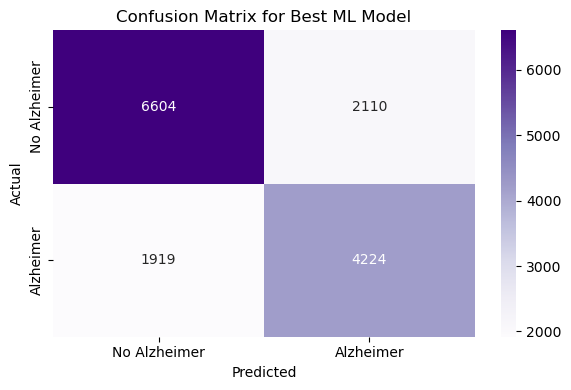

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Predict on the test set
y_pred = best_model.predict(X_test)

# Predict probabilities (if supported)
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test)[:, 1]
else:
    y_prob = best_model.decision_function(X_test)

# Evaluate the model
print("\n Performance on Test Set:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")

#  Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Alzheimer", "Alzheimer"]))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["No Alzheimer", "Alzheimer"], yticklabels=["No Alzheimer", "Alzheimer"])
plt.title("Confusion Matrix for Best ML Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [86]:
import joblib

# Save to file
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_deployed_model.pkl")

print(f" Model saved as: {best_model_name.replace(' ', '_').lower()}_deployed_model.pkl")


 Model saved as: xgboost_deployed_model.pkl


# Deep Learning Model(s) Training and Evaluation

In [89]:
# Select relevant features
X_selected = selector.fit_transform(X_var, y)

In [101]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Define function for DL model training and evaluation 
def train_dl_models(X_selected, y, test_size=0.2, random_state=42):
    
    # Define a simple NODE inside the function
    class SimpleNODE(nn.Module):
        def __init__(self, input_dim):
            super(SimpleNODE, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.net(x)

    # Split data into training and testing sets for deep learning models
    X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
        X_selected, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Define the MLP model architecture
    mlp_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the MLP model with Adam optimizer and binary cross-entropy loss
    mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    mlp_model.summary()

    # Train the model on the training data
    history = mlp_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    mlp_preds = mlp_model.predict(X_test_dl)
    mlp_binary = (mlp_preds > 0.5).astype(int)

    # Calculate evaluation metrics for the MLP model
    mlp_metrics = {
        "accuracy": accuracy_score(y_test_dl, mlp_binary),
        "precision": precision_score(y_test_dl, mlp_binary),
        "recall": recall_score(y_test_dl, mlp_binary),
        "f1_score": f1_score(y_test_dl, mlp_binary)
    }

    # Print Accuracy and Classification report
    print("\n\n MLP Accuracy:", round(mlp_metrics['accuracy'], 4))
    print("\nMLP Classification Report:")
    print(classification_report(y_test_dl, mlp_binary, target_names=["No Alzheimer", "Alzheimer"]))

    # TabNet Model
    # Split data into training and testing sets, ensuring y is in a suitable format
    y_tab = y.values if hasattr(y, 'values') else y
    X_train_tab, X_test_tab, y_train_tab, y_test_tab = train_test_split(
        X_selected, y_tab, test_size=test_size, stratify=y_tab, random_state=random_state
    )

    # Initialize and train a TabNet classifier model
    tabnet_model = TabNetClassifier(optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.02),
    verbose=1)
    tabnet_model.fit(
        X_train_tab, y_train_tab,
        eval_set=[(X_test_tab, y_test_tab)],
        eval_metric=['accuracy'],
        max_epochs=50,
        batch_size=1024
    )
    
    tabnet_preds = tabnet_model.predict(X_test_tab)

    # Calculate evaluation metrics for the TabNet model
    tabnet_metrics = {
        "accuracy": accuracy_score(y_test_tab, tabnet_preds),
        "precision": precision_score(y_test_tab, tabnet_preds),
        "recall": recall_score(y_test_tab, tabnet_preds),
        "f1_score": f1_score(y_test_tab, tabnet_preds)
    }

    # Print Accuracy and Classification report
    print("\n\n TabNet Accuracy:", round(tabnet_metrics['accuracy'], 6))
    print("\n\n TabNet Classification Report:")
    print(classification_report(y_test_tab, tabnet_preds, target_names=["No Alzheimer", "Alzheimer"]))

    # NODE Model
    # Define a pipeline for NODE model
    node_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('net', NeuralNetBinaryClassifier(
            module=SimpleNODE,
            module__input_dim=X_selected.shape[1],
            max_epochs=50,
            lr=0.001,
            batch_size=32,
            optimizer=torch.optim.Adam,
            iterator_train__shuffle=True,
            train_split=None,
            verbose=1,
            device='cpu',
            callbacks=[
                EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
                EpochScoring(scoring='accuracy', name='valid_acc', on_train=False)
            ]
        ))
    ])

    node_pipeline.fit(X_train_dl.astype('float32'), y_train_dl.astype('float32'))
    node_preds = node_pipeline.predict(X_test_dl.astype('float32'))

    # Calculate evaluation metrics for the NODE model
    node_metrics = {
        "accuracy": accuracy_score(y_test_dl, node_preds),
        "precision": precision_score(y_test_dl, node_preds),
        "recall": recall_score(y_test_dl, node_preds),
        "f1_score": f1_score(y_test_dl, node_preds)
    }

    # Print Accuracy and Classification report
    print("\n\n NODE Accuracy:", round(node_metrics['accuracy'], 6))
    print("\n\n NODE Classification Report:")
    print(classification_report(y_test_dl, node_preds, target_names=["No Alzheimer", "Alzheimer"]))

    # Compile deep learning model metrics
    dl_results = {
        "MLP": mlp_metrics,
        "TabNet": tabnet_metrics,
        "NODE": node_metrics
    }

    # Return for further analysis
    return dl_results, mlp_model, tabnet_model, node_pipeline, history, X_test_dl, y_test_dl, X_test_tab, y_test_tab, node_preds
  
# Call the function and unpack all returned values
dl_results, mlp_model, tabnet_model, node_pipeline, mlp_history, X_test_dl, y_test_dl, X_test_tab, y_test_tab, node_preds = train_dl_models(X_selected, y)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6750 - loss: 0.5960 - val_accuracy: 0.7145 - val_loss: 0.5492
Epoch 2/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7107 - loss: 0.5605 - val_accuracy: 0.7165 - val_loss: 0.5461
Epoch 3/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7140 - loss: 0.5478 - val_accuracy: 0.7155 - val_loss: 0.5458
Epoch 4/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7106 - loss: 0.5525 - val_accuracy: 0.7195 - val_loss: 0.5440
Epoch 5/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7191 - loss: 0.5436 - val_accuracy: 0.7169 - val_loss: 0.5433
Epoch 6/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7195 - loss: 0.5447 - val_accuracy: 0.7190 - val_loss: 0.5412
Epoch 7/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7150 - loss: 0.5456 - val_accuracy: 0.7194 - val_loss: 0.5426
Epoch 8/50
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7191 - loss: 0.5409

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


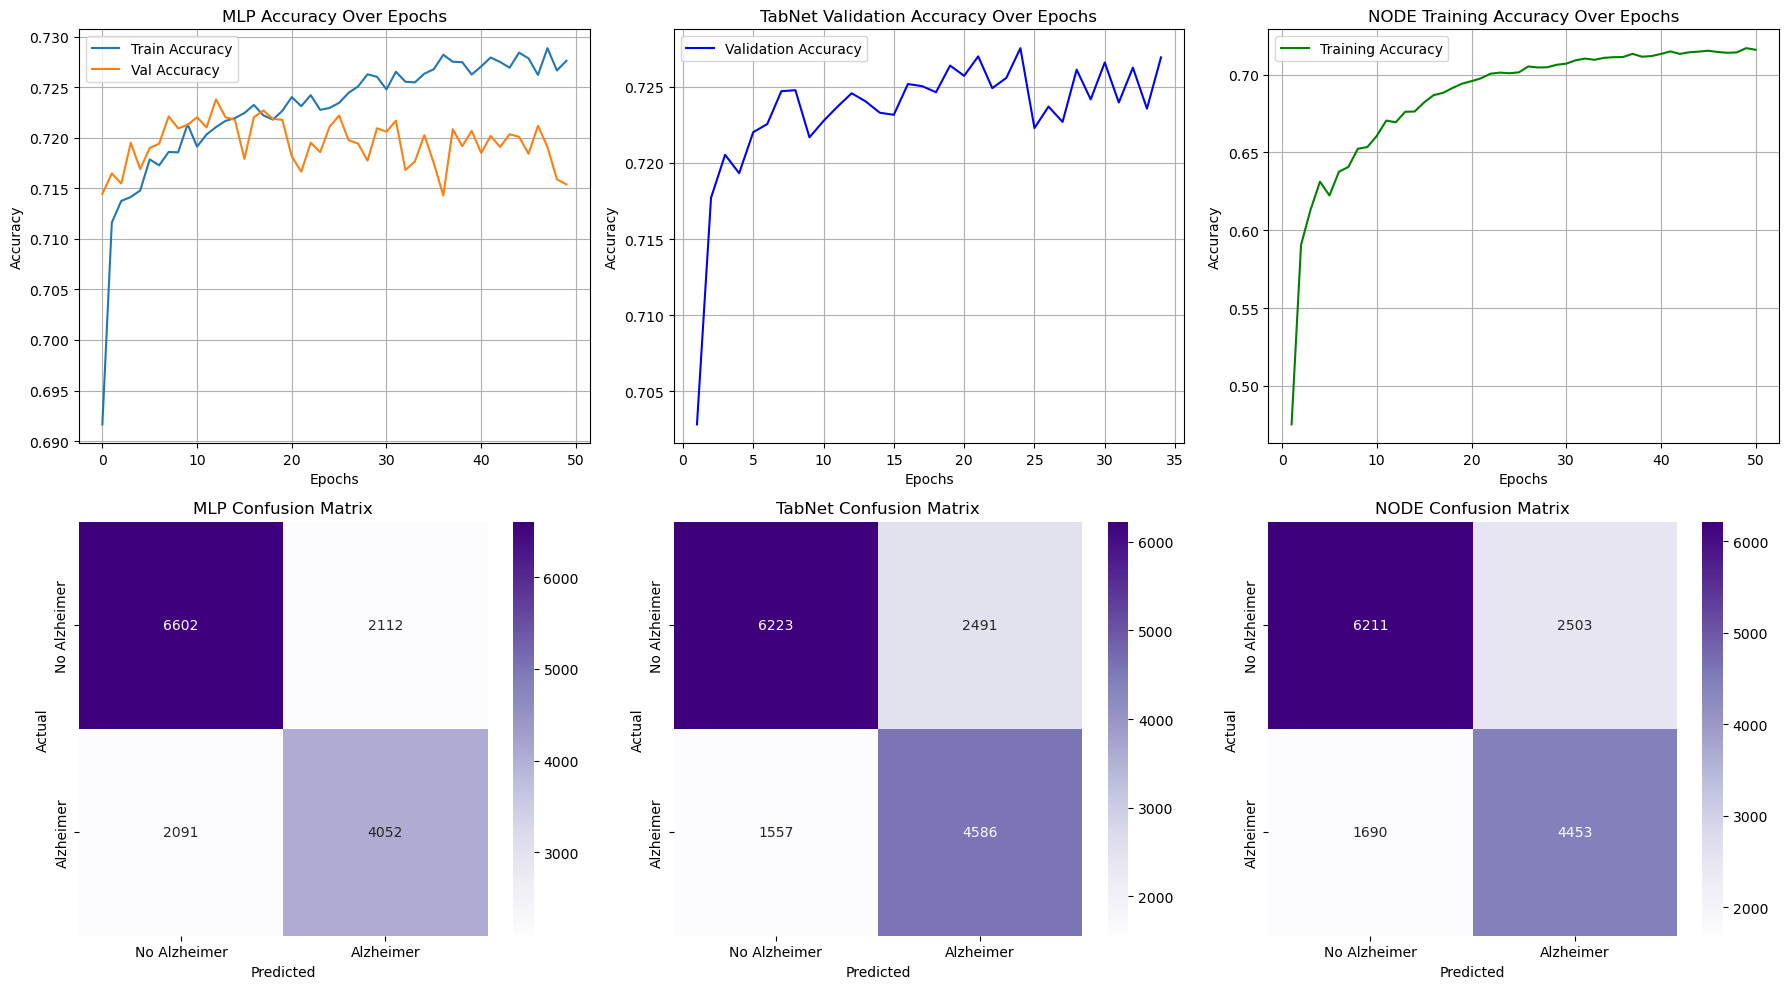

In [105]:
from sklearn.metrics import precision_recall_curve

def visualize_dl_models(mlp_model, tabnet_model, node_pipeline, node_preds, X_test_dl, y_test_dl, X_test_tab, y_test_tab, mlp_history=None):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # MLP Accuracy
    if mlp_history:
        axes[0, 0].plot(mlp_history.history['accuracy'], label='Train Accuracy')
        axes[0, 0].plot(mlp_history.history['val_accuracy'], label='Val Accuracy')
        axes[0, 0].set_title('MLP Accuracy Over Epochs')
        axes[0, 0].set_xlabel('Epochs')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        axes[0, 0].grid(True)

    # TabNet Validation Accuracy
    if hasattr(tabnet_model, 'history') and hasattr(tabnet_model.history, 'history') and 'val_0_accuracy' in tabnet_model.history.history:
        val_acc = tabnet_model.history.history['val_0_accuracy']
        epochs = list(range(1, len(val_acc) + 1))
        axes[0, 1].plot(epochs, val_acc, color='blue', label='Validation Accuracy')
        axes[0, 1].set_title('TabNet Validation Accuracy Over Epochs')
        axes[0, 1].set_xlabel('Epochs')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()
        axes[0, 1].grid(True)

    # NODE Training Accuracy
    try:
        node_history = node_pipeline.named_steps['net'].history
        if len(node_history) > 0 and isinstance(node_history[-1], dict) and 'train_acc' in node_history[-1]:
            train_acc = [row['train_acc'] for row in node_history if 'train_acc' in row]
            epochs = list(range(1, len(train_acc) + 1))
            axes[0, 2].plot(epochs, train_acc, color='green', label='Training Accuracy')
            axes[0, 2].set_title('NODE Training Accuracy Over Epochs')
            axes[0, 2].set_xlabel('Epochs')
            axes[0, 2].set_ylabel('Accuracy')
            axes[0, 2].legend()
            axes[0, 2].grid(True)
        else:
            axes[0, 2].text(0.5, 0.5, "No training accuracy\nrecorded for NODE", 
                            ha='center', va='center', fontsize=12)
            axes[0, 2].set_title('NODE Training Accuracy')
            axes[0, 2].axis('off')
    except Exception as e:
        print("\nCould not plot NODE training accuracy:", e)

    # Confusion Matrices
    mlp_preds = (mlp_model.predict(X_test_dl) > 0.5).astype(int).flatten()
    tabnet_preds = tabnet_model.predict(X_test_tab)

    for ax, (name, y_true, y_pred) in zip(axes[1], [
        ("MLP", y_test_dl, mlp_preds),
        ("TabNet", y_test_tab, tabnet_preds),
        ("NODE", y_test_dl, node_preds)
    ]):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=ax,
                    xticklabels=["No Alzheimer", "Alzheimer"],
                    yticklabels=["No Alzheimer", "Alzheimer"])
        ax.set_title(f'{name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

visualize_dl_models(
    mlp_model,
    tabnet_model,
    node_pipeline,
    node_preds,
    X_test_dl,
    y_test_dl,
    X_test_tab,
    y_test_tab,
    mlp_history=mlp_history
)

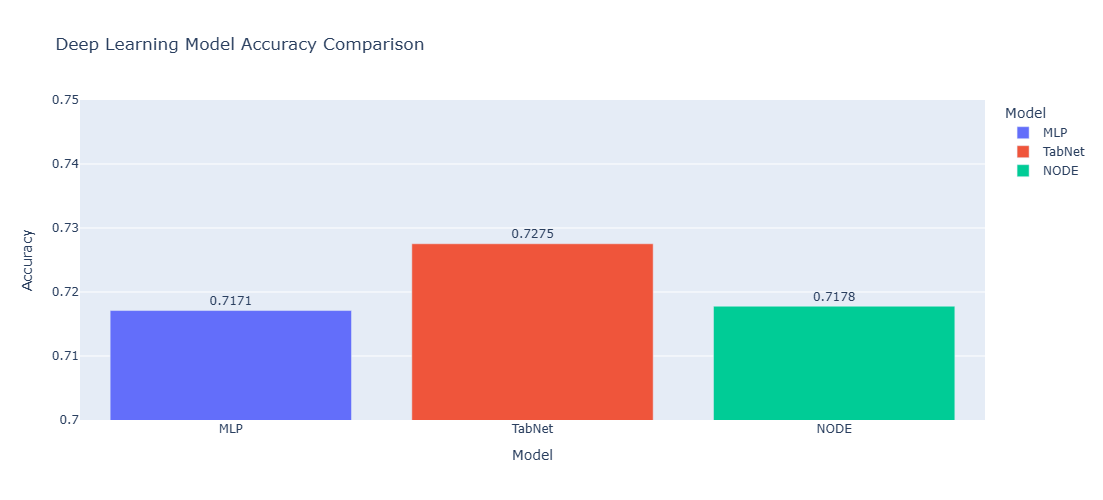

In [107]:
# Define a function to visualise the DL model's accuracies
def visualize_dl_accuracies(dl_results):
    df = pd.DataFrame([{
        "Model": model,
        "Accuracy": metrics["accuracy"]
    } for model, metrics in dl_results.items()])

    # Create a bar chart to visualize accuracy comparison
    fig = px.bar(
        df,
        x="Model",
        y="Accuracy",
        text=df["Accuracy"].round(4),
        color="Model",
        title="Deep Learning Model Accuracy Comparison",
        height=500
    )
    # Customize chart appearance and display
    fig.update_traces(textposition="outside")
    fig.update_layout(yaxis=dict(range=[0.70, 0.75]))
    fig.show()

#Call the funtion
visualize_dl_accuracies(dl_results)


In [109]:
# Create a function to select best DL model based on specified metric
def select_best_dl_model(dl_results, metric="accuracy"):
  
    if not dl_results:
        raise ValueError(" dl_results dictionary is empty.")

    if metric not in dl_results[list(dl_results.keys())[0]]:
        raise ValueError(f" Metric '{metric}' not found in dl_results.")

    best_model_name = max(dl_results, key=lambda m: dl_results[m][metric])
    best_score = dl_results[best_model_name][metric]

    print(f"\n Best DL Model based on {metric}:")
    print(f" {best_model_name} → {metric.capitalize()}: {best_score:.4f}")

    return best_model_name, best_score

# Call the function
best_dl_model_name, best_dl_score = select_best_dl_model(dl_results, metric="accuracy")


 Best DL Model based on accuracy:
 TabNet → Accuracy: 0.7275


# Comparison of DL and ML Best Models

In [112]:
def compare_best_models(dl_results, tuned_ml_results, metric="accuracy"):

    # Get best DL model
    best_dl_name = max(dl_results, key=lambda m: dl_results[m][metric])
    best_dl_score = dl_results[best_dl_name][metric]

    # Get best ML model
    best_ml_name = max(tuned_ml_results, key=lambda m: tuned_ml_results[m]["best_score"])
    best_ml_score = tuned_ml_results[best_ml_name]["best_score"]

    # Print comparison
    print("\n Best Model Comparison Based on", metric.upper())
    print(f" Best DL Model: {best_dl_name} → {metric}: {best_dl_score:.4f}")
    print(f" Best ML Model: {best_ml_name} → {metric}: {best_ml_score:.4f}")

    # Determine overall best
    if best_dl_score > best_ml_score:
        print(f"\n Best Overall Model: {best_dl_name} (Deep Learning)")
    else:
        print(f"\n Best Overall Model: {best_ml_name} (Machine Learning)")

    return {
        "best_dl": (best_dl_name, best_dl_score),
        "best_ml": (best_ml_name, best_ml_score)
    }

#Call the function
compare_best_models(dl_results, tuned_ml_results, metric="accuracy")




 Best Model Comparison Based on ACCURACY
 Best DL Model: TabNet → accuracy: 0.7275
 Best ML Model: XGBoost → accuracy: 0.7268

 Best Overall Model: TabNet (Deep Learning)


{'best_dl': ('TabNet', 0.7275358416907854),
 'best_ml': ('XGBoost', 0.7268031772499578)}

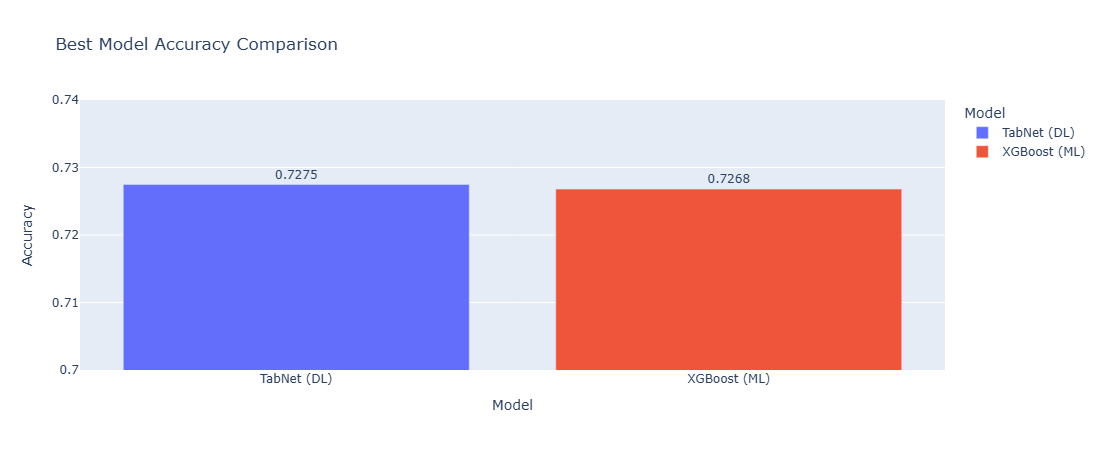

In [114]:
import pandas as pd
import plotly.express as px

# Accuracy results
comparison_data = {
    "Model": ["TabNet (DL)", "XGBoost (ML)"],
    "Accuracy": [0.7275, 0.7268]
}

# Create DataFrame
df = pd.DataFrame(comparison_data)

# Plot interactive bar chart
fig = px.bar(
    df,
    x="Model",
    y="Accuracy",
    text="Accuracy",
    color="Model",
    title=" Best Model Accuracy Comparison",
    height=450
)
# Customize chart appearance and display
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0.70, 0.74]))
fig.show()


# Train and Evaluate the Best Model for Alzheimer's Prediction


 Performance on Test Set:
Accuracy     : 0.7288
Precision    : 0.6669
Recall       : 0.6876
F1 Score     : 0.6771

 Classification Report for TabNet (Best Model):
              precision    recall  f1-score   support

No Alzheimer       0.80      0.71      0.75      8714
   Alzheimer       0.65      0.75      0.69      6143

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.74      0.73      0.73     14857



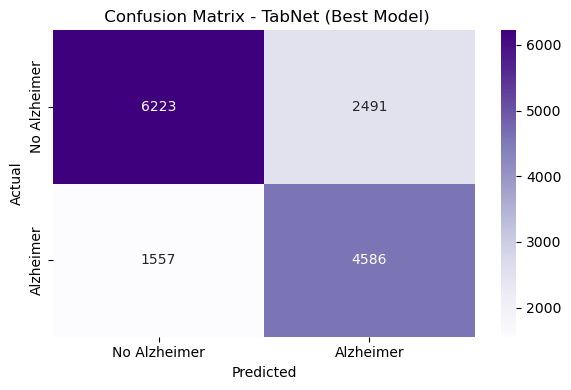

In [170]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best DL model (TabNet)
tabnet_preds = tabnet_model.predict(X_test_tab)

# Evaluate the model
print("\n Performance on Test Set:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")

# Print classification report
print("\n Classification Report for TabNet (Best Model):")
print(classification_report(y_test_tab, tabnet_preds, target_names=["No Alzheimer", "Alzheimer"]))

# Plot confusion matrix
cm = confusion_matrix(y_test_tab, tabnet_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Alzheimer", "Alzheimer"],
            yticklabels=["No Alzheimer", "Alzheimer"])
plt.title(" Confusion Matrix - TabNet (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [119]:
# Save the best overall model (TabNet)
tabnet_model.save_model("tabnet_best_overall_model.zip")

print(" Best Overall Model (TabNet) saved as: tabnet_best_overall_model.zip")


Successfully saved model at tabnet_best_overall_model.zip.zip
 Best Overall Model (TabNet) saved as: tabnet_best_overall_model.zip
